# Dataset lookup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

#df = pd.read_csv(f'{drive_path}/electricity_price_hourly_2_zone_supplier_price_2021-06-24__2024-06-24.csv', index_col = 'date')
df = pd.read_csv('electricity_price_hourly_2_zone_supplier_price_2021-06-24__2024-06-24.csv', index_col = 'date')
df.index = pd.to_datetime(df.index)
df

year  quarter  month  week_of_year  day_of_year   
date                                                                         
2021-06-24 00:00:00+00:00  2021        2      6            25          175  \
2021-06-24 01:00:00+00:00  2021        2      6            25          175   
2021-06-24 02:00:00+00:00  2021        2      6            25          175   
2021-06-24 03:00:00+00:00  2021        2      6            25          175   
2021-06-24 04:00:00+00:00  2021        2      6            25          175   
...                         ...      ...    ...           ...          ...   
2024-06-24 19:00:00+00:00  2024        2      6            26          176   
2024-06-24 20:00:00+00:00  2024        2      6            26          176   
2024-06-24 21:00:00+00:00  2024        2      6            26          176   
2024-06-24 22:00:00+00:00  2024        2      6            26          176   
2024-06-24 23:00:00+00:00  2024        2      6            26          176   

                           day_of_week  day  hour  supplier_price  
date                                                               
2021-06-24 00:00:00+00:00            3   24     0          669.88  
2021-06-24 01:00:00+00:00            3   24     1          671.66  
2021-06-24 02:00:00+00:00            3   24     2          674.60  
2021-06-24 03:00:00+00:00            3   24     3          661.88  
2021-06-24 04:00:00+00:00            3   24     4          708.72  
...                                ...  ...   ...             ...  
2024-06-24 19:00:00+00:00            0   24    19         1193.24  
2024-06-24 20:00:00+00:00            0   24    20         1062.33  
2024-06-24 21:00:00+00:00            0   24    21          950.58  
2024-06-24 22:00:00+00:00            0   24    22          917.14  
2024-06-24 23:00:00+00:00            0   24    23          865.91  

[26328 rows x 9 columns]

In [2]:
print(f'We will use {round(len(df) / 24 / 365, 4)} years of observations of Russian day-ahead electricity market supplier prices')

We will use 3.0055 years of observations of Russian day-ahead electricity market supplier prices


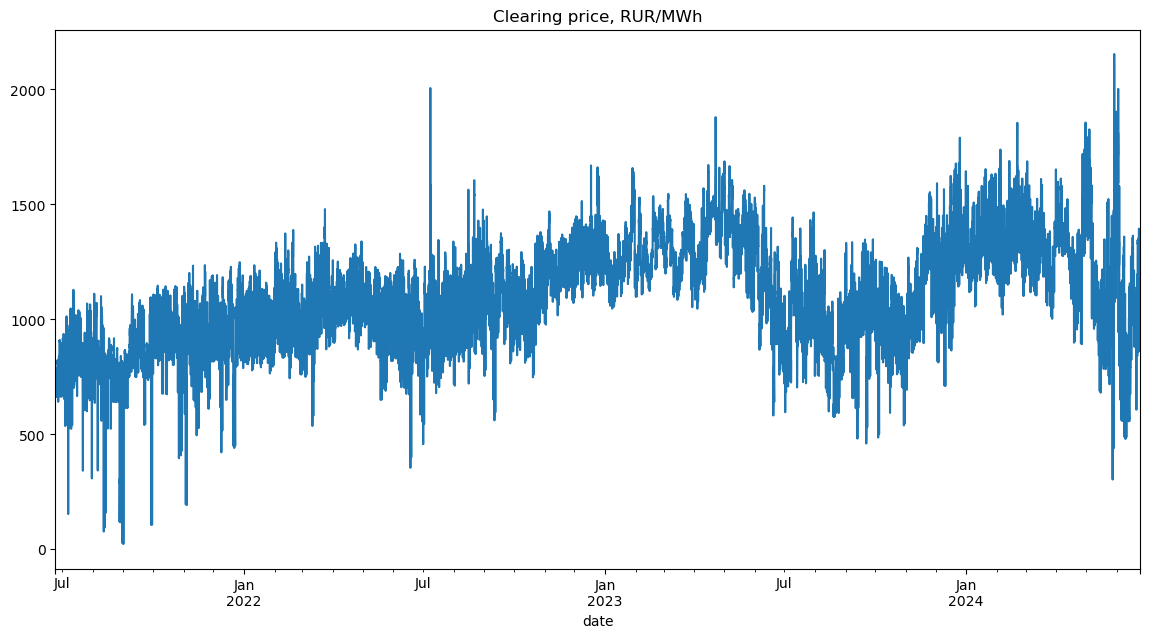

In [5]:
plt.figure(figsize = (14, 7))
df['supplier_price'].plot()
plt.title('Clearing price, RUR/MWh')
plt.show()

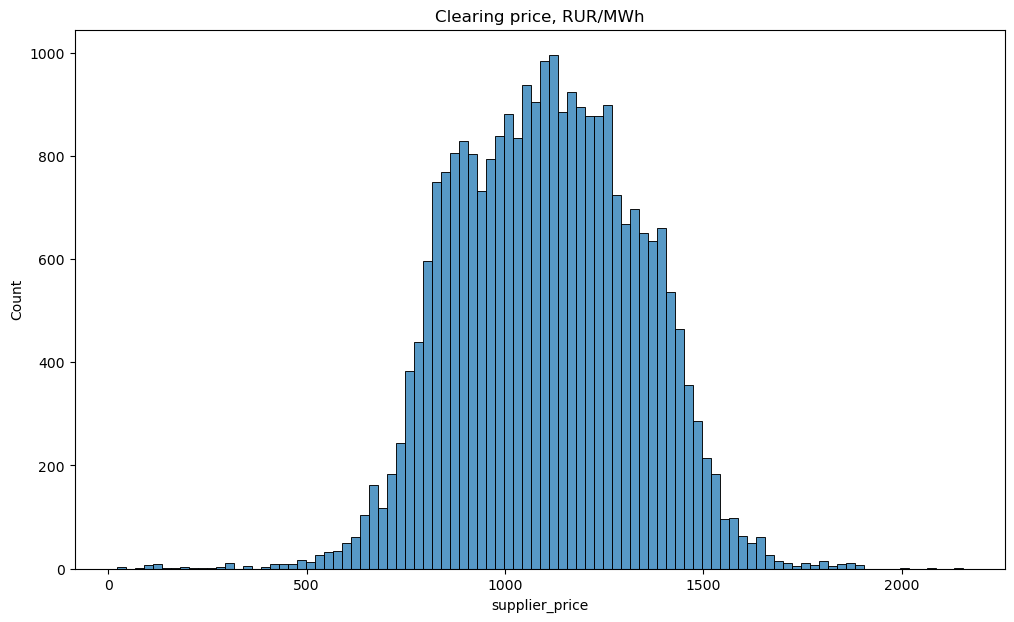

In [6]:
plt.figure(figsize = (12, 7))
plt.title('Clearing price, RUR/MWh')
sb.histplot(df['supplier_price'])
plt.show()

# Train & test split

In [3]:
rows_count = len(df)
proportion = 0.85
train_count = int(rows_count * proportion)
test_count = rows_count - train_count
df_train = df[:train_count].copy()
df_test = df[train_count:train_count + test_count].copy()
print(f'Train: {len(df_train)}')
print(f'Test: {len(df_test)}')

Train: 22378
Test: 3950


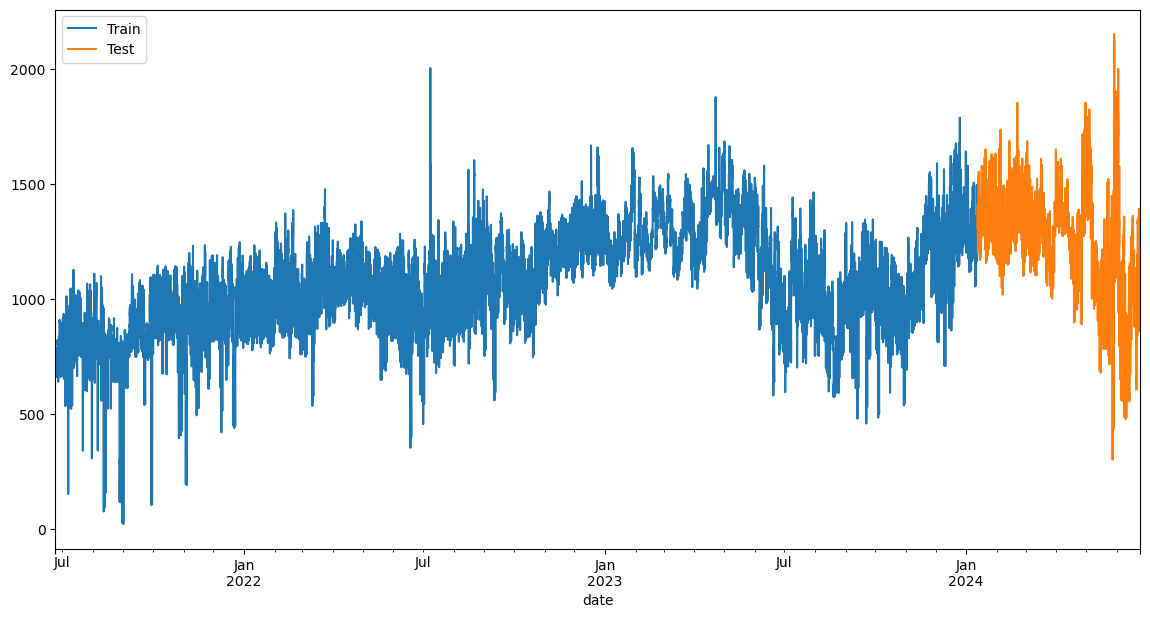

In [4]:
plt.figure(figsize = (14, 7))
df_train['supplier_price'].plot()
df_test['supplier_price'].plot()
plt.legend(['Train', 'Test'])
plt.show()

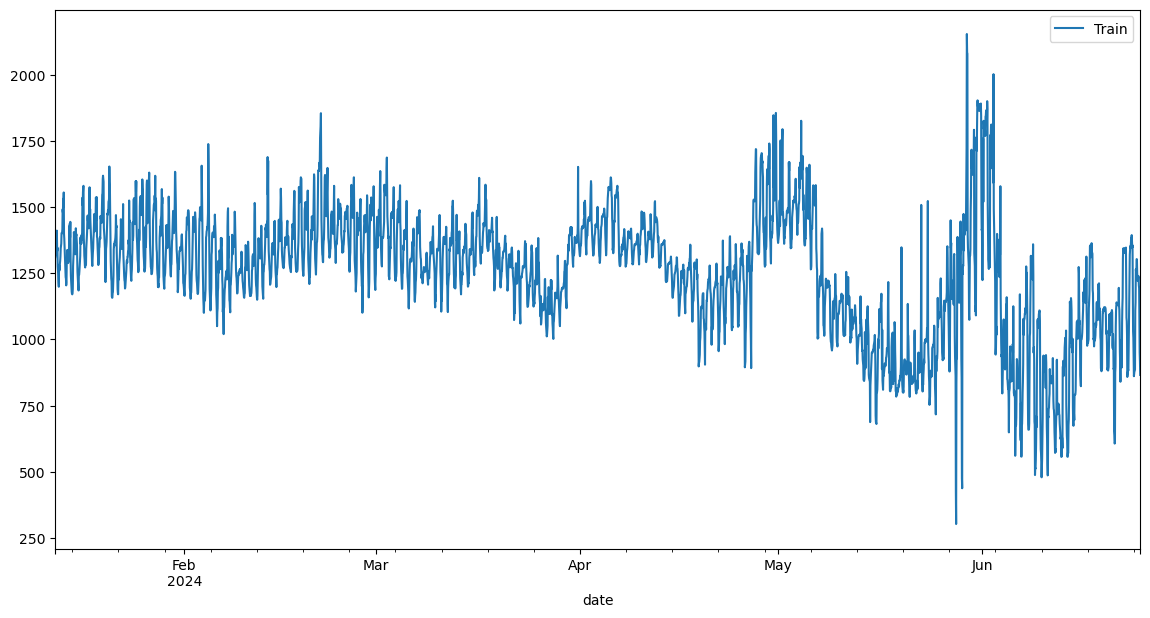

In [12]:
plt.figure(figsize = (14, 7))
df_test['supplier_price'].plot()
plt.legend(['Train', 'Test'])
plt.show()

# Functions, variables & constants

In [4]:
from scipy import stats as st
import statsmodels.api as sm

def run_tests_for_normality(data, alpha = 0.05):
    statistic, p_value = st.normaltest(data)
    if p_value > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f"D'Agostino & Pearson: {result:>11s}")
    print(statistic)
    print()
    statistic, pvalue = st.jarque_bera(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Jarque-Bera: {result:>20s}')
    print(statistic)
    print()
    ksstat, pvalue = sm.stats.diagnostic.kstest_normal(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Kolmogorov-Smirnov: {result:>13s}')
    print(ksstat)
    print()
    ksstat, pvalue = sm.stats.diagnostic.lilliefors(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Lilliefors: {result:>21s}')
    print(ksstat)
    print()
    statistic, pvalue = st.shapiro(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Shapiro-Wilk: {result:>19s}')
    print(statistic)
    print()
    result = st.anderson(data)
    idx = np.where(result.significance_level == alpha * 100)
    if result.statistic < result.critical_values[idx]:
        verdict = 'Normal'
    else:
        verdict = 'NOT Normal'
    print(f'Anderson–Darling: {verdict:>15s}')
    print(result.statistic)
    print()

def show_probability_plot(data):
    st.probplot(data, dist = 'norm', plot = plt)
    plt.show()

def show_quantile_quantile_plot(data):
    sm.qqplot(data, line = '45')
    plt.show()

In [5]:
import numpy as np
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error

def rmse(y_test, y_pred):
    return np.sqrt(mse(y_test, y_pred))

def mape(y_test, y_pred):
    return mean_absolute_percentage_error(y_test, y_pred) * 100.0

def smape(y_test, y_pred):
    absolute_diff = np.abs(y_test - y_pred)
    sum_absolute = np.abs(y_test) + np.abs(y_pred)
    mask = sum_absolute != 0
    return np.mean(200 * (absolute_diff[mask] / sum_absolute[mask]))

# from SKTime
# https://github.com/sktime/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
# https://github.com/sktime/sktime/blob/87aad6e0b9c5ff68f3c7777fdb3d27906ba72009/sktime/performance_metrics/forecasting/_functions.py#L579

EPS = np.finfo(np.float64).eps

# Mean absolute scaled error
def mase(y_test, y_pred, y_train, sp = 1):
    y_test_np = np.asarray(y_test)
    y_pred_np = np.asarray(y_pred)
    y_train_np = np.asarray(y_train)
    y_pred_naive = y_train_np[:-sp]
    mae_naive = np.mean(np.abs(y_train_np[sp:] - y_pred_naive))
    mae_pred = np.mean(np.abs(y_test_np - y_pred_np))
    return mae_pred / np.maximum(mae_naive, EPS)

# Mean squared scaled error
def msse(y_test, y_pred, y_train, sp = 1):
    y_test_np = np.asarray(y_test)
    y_pred_np = np.asarray(y_pred)
    y_train_np = np.asarray(y_train)
    y_pred_naive = y_train_np[:-sp]
    mse_naive = np.mean(np.square(y_train_np[sp:] - y_pred_naive))
    mse_pred = np.mean(np.square(y_test_np - y_pred_np))
    return mse_pred / np.maximum(mse_naive, EPS)

# Root mean squared scaled error
def rmsse(y_test, y_pred, y_train, sp = 1):
    y_test_np = np.asarray(y_test)
    y_pred_np = np.asarray(y_pred)
    y_train_np = np.asarray(y_train)
    y_pred_naive = y_train_np[:-sp]
    mse_naive = np.mean(np.square(y_train_np[sp:] - y_pred_naive))
    mse_pred = np.mean(np.square(y_test_np - y_pred_np))
    return np.sqrt(mse_pred / np.maximum(mse_naive, EPS))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import autocorrelation_plot

def show_regression_chart(y, prediction, title, sort = True):
    t = pd.DataFrame({'prediction': prediction, 'y': y})
    if sort:
        t.sort_values(by = ['y'], inplace = True)
    plt.figure(figsize = (10, 6))
    plt.plot(t['y'].tolist(), label = 'Expected')
    plt.plot(t['prediction'].tolist(), label = 'Prediction')
    plt.ylabel('Output')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.title(title)
    plt.show()

def show_line_plot(data, title):
    plt.figure(figsize = (10, 6))
    plt.plot(data)
    plt.xticks(rotation = 45)
    plt.title(title)
    plt.show()
    
def show_histogram(data, title):
    plt.title(title)
    sb.histplot(data)
    plt.show()
    
def show_acf_plot(data, title):
    autocorrelation_plot(data)
    plt.title(title)
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

def get_scaled_data(df_train, df_test):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(df_train)
    train_scaled = pd.DataFrame(train_scaled, columns = df_train.columns, index = df_train.index)
    test_scaled = scaler.transform(df_test)
    test_scaled = pd.DataFrame(test_scaled, columns = df_test.columns, index = df_test.index)
    x_train, y_train = train_scaled.drop(columns = TARGET_COLUMN), train_scaled[[TARGET_COLUMN]]
    x_test, y_test = test_scaled.drop(columns = TARGET_COLUMN), test_scaled[[TARGET_COLUMN]]
    return x_train, y_train, x_test, y_test, scaler

In [8]:
import random
import numpy as np

RANDOM_STATE = 42
N_JOBS = 8
TARGET_COLUMN = 'supplier_price'

# seasonality period in the time series data
SEASONALITY = 24

np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

names = []
results = {
    'r2' : [],
    'mse' : [],
    'rmse' : [],
    'mae' : [],
    'mape' : [],
    'smape' : [],
    'mase' : [],
    'msse' : [],
    'rmsse' : []
}

In [9]:
BATCH_SIZE = 32
EPOCHS = 10
NUM_OF_VARIABLES = df_train.shape[-1] - 1
INPUT_SHAPE_FF =  (NUM_OF_VARIABLES,)

# Predictions

## ML & DL models

In [10]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [11]:
class DriftRegressor:
    def __init__(self):
        self.y_0 = 0
        self.y_1 = 0
        self.is_fit = False

    def fit(self, x_train, y_train):
        if len(x_train) != len(y_train):
            raise Exception('Train and test sequences have different lengths!')
        self.y_0 = y_train.iloc[0][0]
        self.y_1 = y_train.iloc[-1][0]
        self.is_fit = True

    def predict(self, x_test):
        if self.is_fit == False:
            raise Exception('Predictor was not trained!')
        output = []
        if len(x_test) <= 1:
            output.append(self.y_0)
            return output
        x_0 = 0
        x_1 = len(x_test)
        l = abs(x_1 - x_0)
        dy = (self.y_1 - self.y_0) / l
        y = self.y_0
        i = 1
        while i <= l:
            output.append(y)
            y += dy
            i += 1
        return np.array(output)
    

class ConstantRegressor:
    def __init__(self):
        self.constant = 0
        self.is_fit = False

    def fit(self, x_train, y_train):
        if len(x_train) != len(y_train):
            raise Exception('Train and test sequences have different lengths!')
        self.constant = y_train.iloc[0][0]
        self.is_fit = True

    def predict(self, x_test):
        if self.is_fit == False:
            raise Exception('Predictor was not trained!')
        return np.array([self.constant] * len(x_test))

In [12]:
models = []
models.append(('Naive', ConstantRegressor()))
models.append(('Average', DummyRegressor(strategy = 'mean')))
models.append(('Drift', DriftRegressor()))
models.append(('LR', LinearRegression(fit_intercept = False)))
models.append(('Bayesian R.', BayesianRidge(fit_intercept = False)))
models.append(('PAR', PassiveAggressiveRegressor(
    max_iter = 100,
    random_state = RANDOM_STATE,
    tol = 1e-3,
    fit_intercept = False)))
models.append(('SGD', SGDRegressor(random_state = RANDOM_STATE, shuffle = False, fit_intercept = False)))
models.append(('SVR', SVR(max_iter = 100)))
models.append(('Lin. SVR', LinearSVR(max_iter = 100, random_state = RANDOM_STATE, fit_intercept = False)))
models.append(('KNN', KNeighborsRegressor(n_neighbors = 20, n_jobs = N_JOBS)))
models.append(('CART', DecisionTreeRegressor(random_state = RANDOM_STATE)))
models.append(('RF', RandomForestRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
models.append(('RF w/B.', RandomForestRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
models.append(('XT', ExtraTreesRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
models.append(('XT w/B.', ExtraTreesRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
models.append(('BAG', BaggingRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
models.append(('BAG w/B.', BaggingRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
models.append(('ADA', AdaBoostRegressor(random_state = RANDOM_STATE)))
models.append(('HGBoost', HistGradientBoostingRegressor(random_state = RANDOM_STATE)))
models.append(('XGBoost', XGBRegressor(tree_method = 'gpu_hist', verbosity = 0, random_state = RANDOM_STATE)))
models.append(('CatBoost', CatBoostRegressor(
    random_seed = RANDOM_STATE,
    loss_function = 'RMSE',
    eval_metric = 'MAE',
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    logging_level = 'Silent')))

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense

tf.random.set_seed(RANDOM_STATE)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
def get_perceptron_1(input_shape):
    model = Sequential(
        [
            Input(shape = input_shape),
            Dense(10, activation = 'relu'),
            Dense(5, activation = 'relu'),
            Dense(2, activation = 'relu'),
            Dense(1)
        ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

def get_perceptron_2(input_shape):
    model = Sequential(
        [
            Input(shape = input_shape),
            Dense(20, activation = 'relu'),
            Dense(10, activation = 'relu'),
            Dense(5, activation = 'relu'),
            Dense(1)
        ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

def get_perceptron_3(input_shape):
    model = Sequential(
        [
            Input(shape = input_shape),
            Dense(20, activation = 'relu'),
            Dense(10, activation = 'relu'),
            Dense(5, activation = 'relu'),
            Dense(2, activation = 'relu'),
            Dense(1)
        ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

def get_perceptron_4(input_shape):
    model = Sequential(
        [
            Input(shape = input_shape),
            Dense(10, activation = 'relu'),
            Dense(1)
        ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

def get_perceptron_5(input_shape):
    model = Sequential(
        [
            Input(shape = input_shape),
            Dense(10, activation = 'relu'),
            Dense(5, activation = 'relu'),
            Dense(1)
        ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [15]:
models.append(('FFNN-10-1', get_perceptron_4(INPUT_SHAPE_FF)))
models.append(('FFNN-10-5-1', get_perceptron_5(INPUT_SHAPE_FF)))
models.append(('FFNN-10-5-2-1', get_perceptron_1(INPUT_SHAPE_FF)))
models.append(('FFNN-20-10-5-1', get_perceptron_2(INPUT_SHAPE_FF)))
models.append(('FFNN-20-10-5-2-1', get_perceptron_3(INPUT_SHAPE_FF)))

In [16]:
x_train, y_train, x_test, y_test, scaler = get_scaled_data(df_train, df_test)

----------------
Naive model...


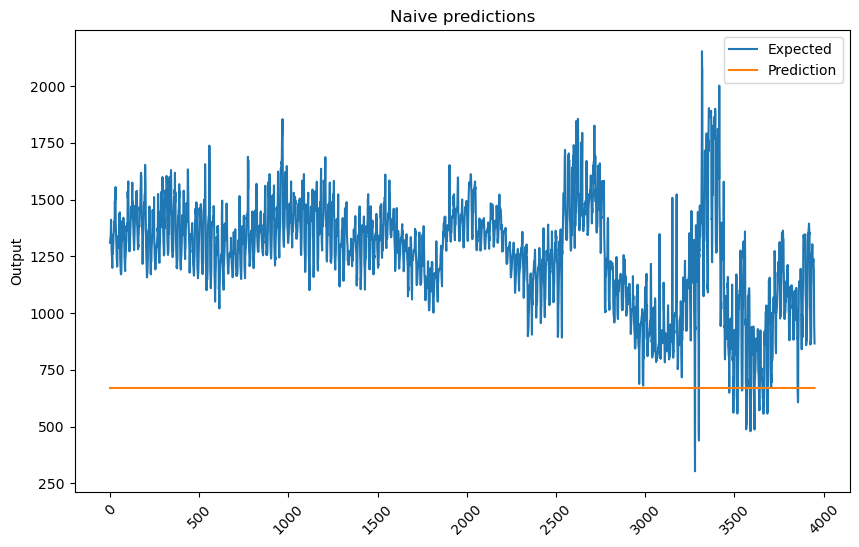

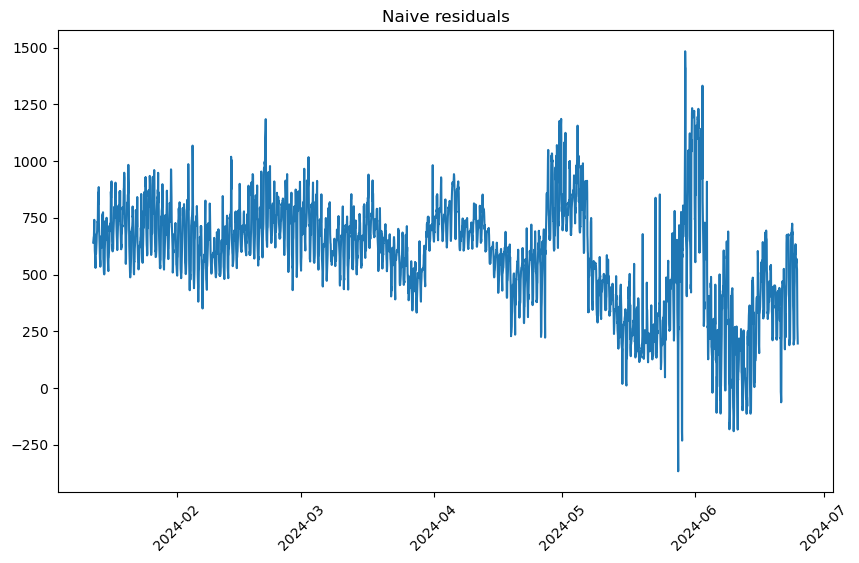

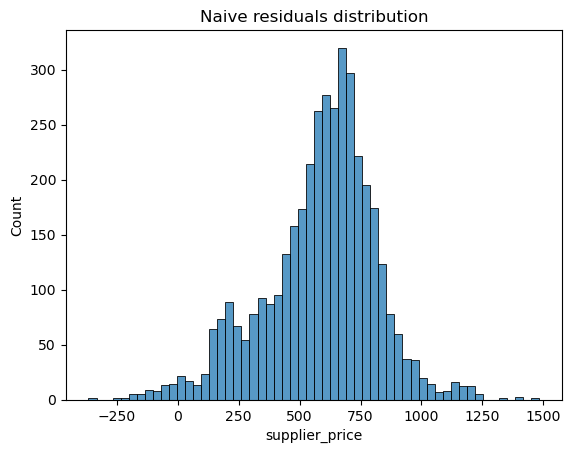

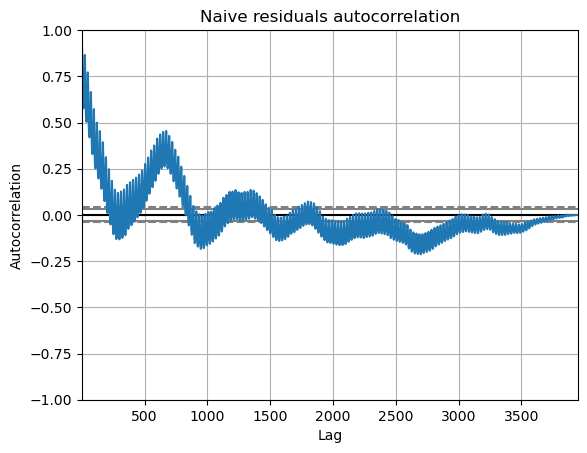

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
180.14719135812385

Jarque-Bera:           NOT Normal
227.98165492517856

Kolmogorov-Smirnov:    NOT Normal
0.07601529190972761

Lilliefors:            NOT Normal
0.07601529190972761

Shapiro-Wilk:          NOT Normal
0.9761893153190613

Anderson–Darling:      NOT Normal
36.48628388092584

----------------
Average model...


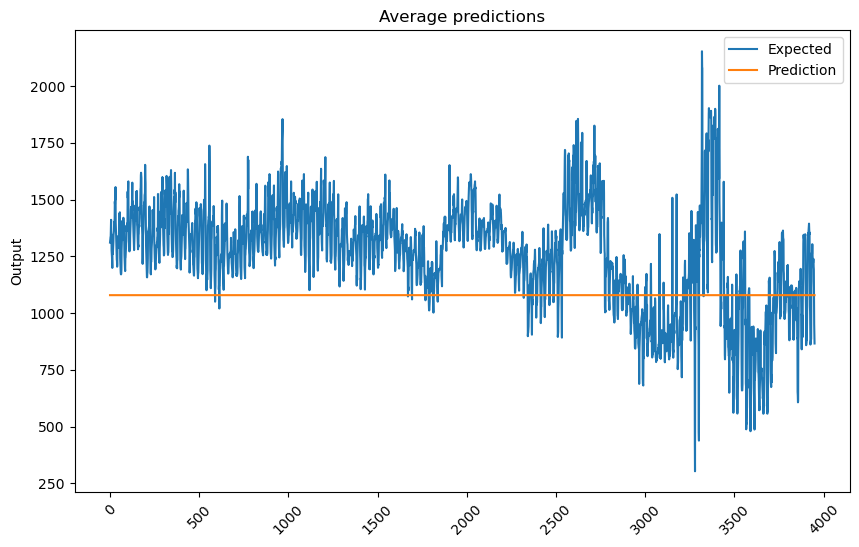

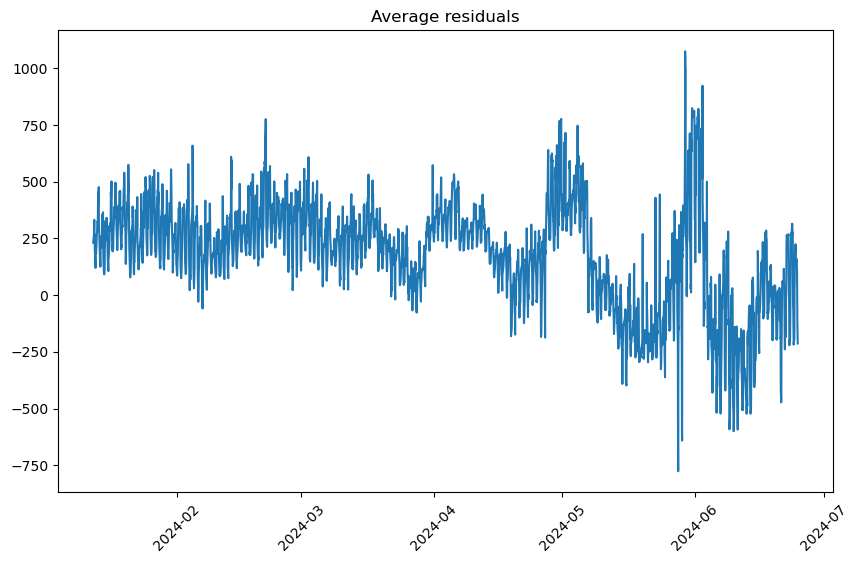

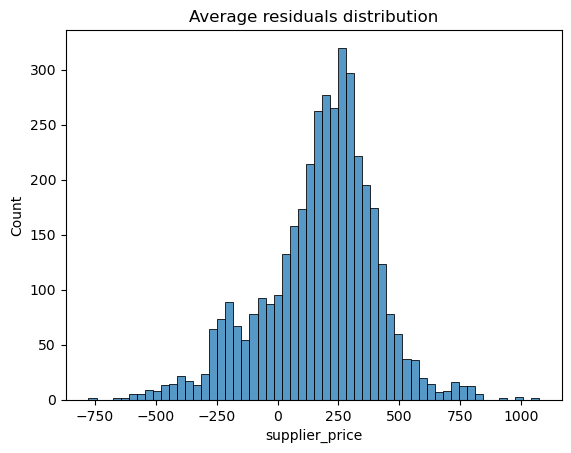

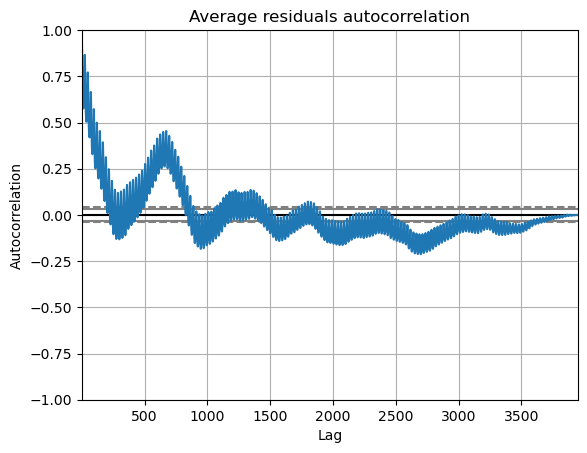

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
180.14719135812385

Jarque-Bera:           NOT Normal
227.98165492517856

Kolmogorov-Smirnov:    NOT Normal
0.07601529190972761

Lilliefors:            NOT Normal
0.07601529190972761

Shapiro-Wilk:          NOT Normal
0.9761893153190613

Anderson–Darling:      NOT Normal
36.48628388092584

----------------
Drift model...


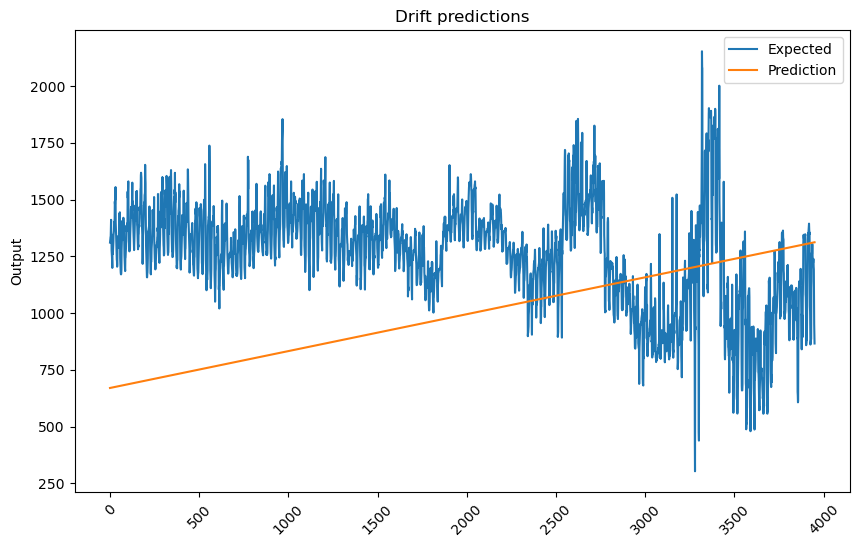

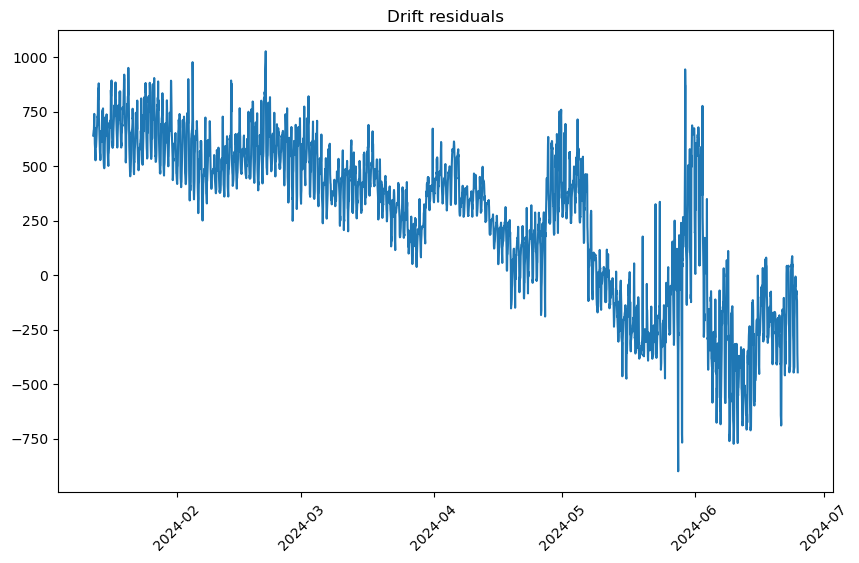

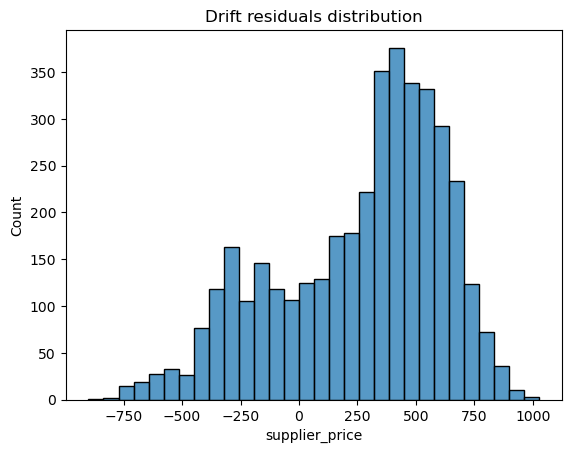

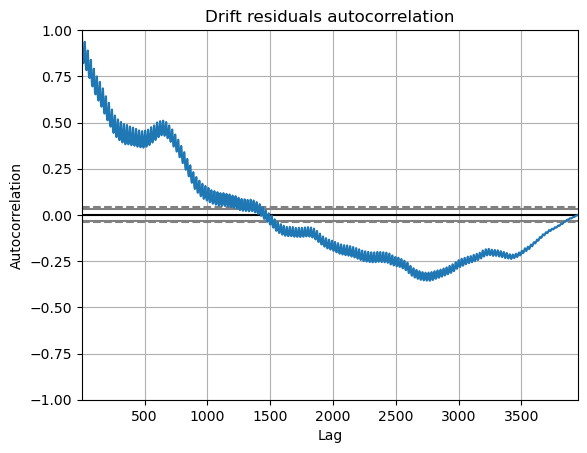

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
277.17677438057865

Jarque-Bera:           NOT Normal
306.6378945540824

Kolmogorov-Smirnov:    NOT Normal
0.11351793987003367

Lilliefors:            NOT Normal
0.11351793987003367

Shapiro-Wilk:          NOT Normal
0.9484503269195557

Anderson–Darling:      NOT Normal
75.13624693462361

----------------
LR model...


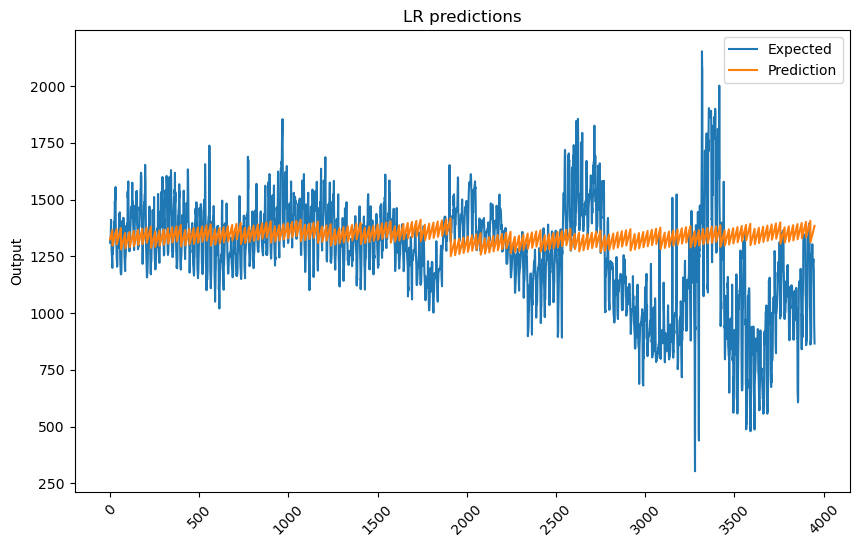

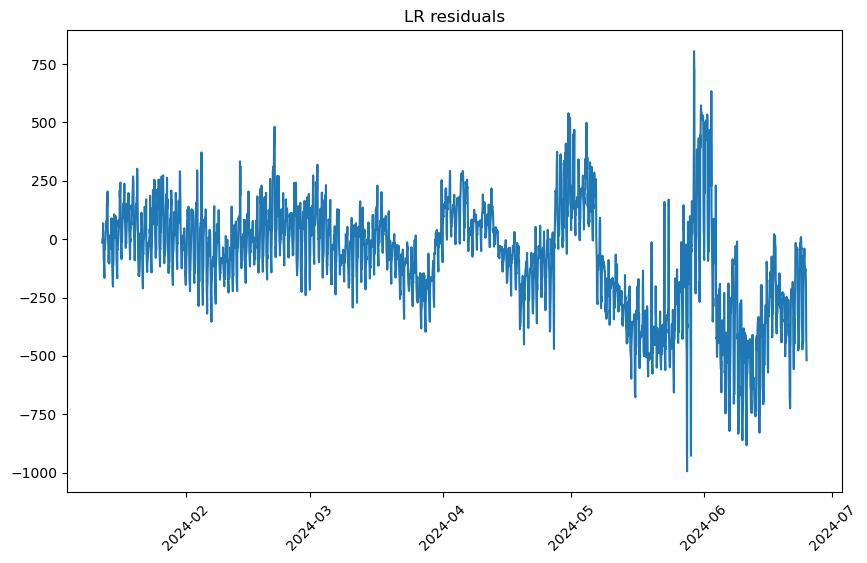

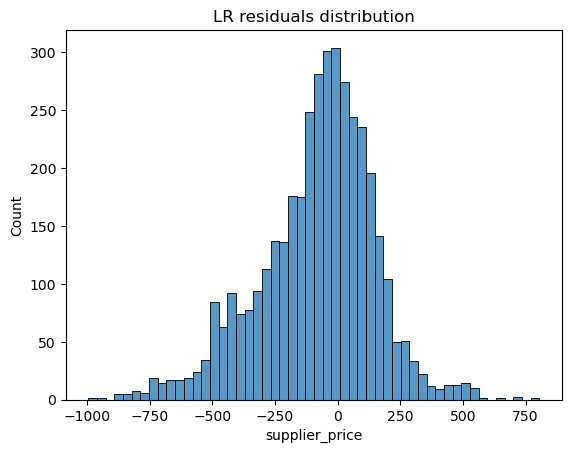

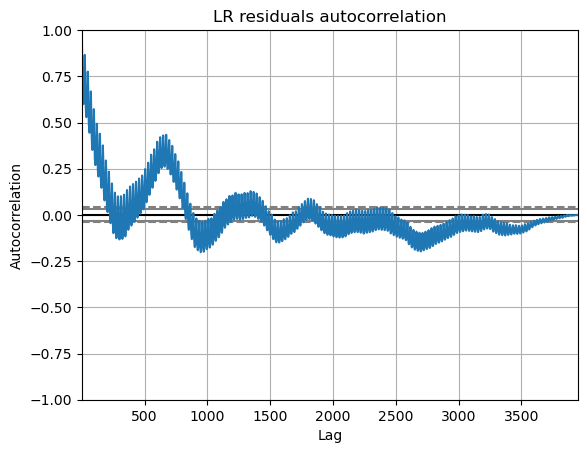

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
177.1760755085818

Jarque-Bera:           NOT Normal
221.72781723619502

Kolmogorov-Smirnov:    NOT Normal
0.07239907929664885

Lilliefors:            NOT Normal
0.07239907929664885

Shapiro-Wilk:          NOT Normal
0.9788002967834473

Anderson–Darling:      NOT Normal
30.77425852826127

----------------
Bayesian R. model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


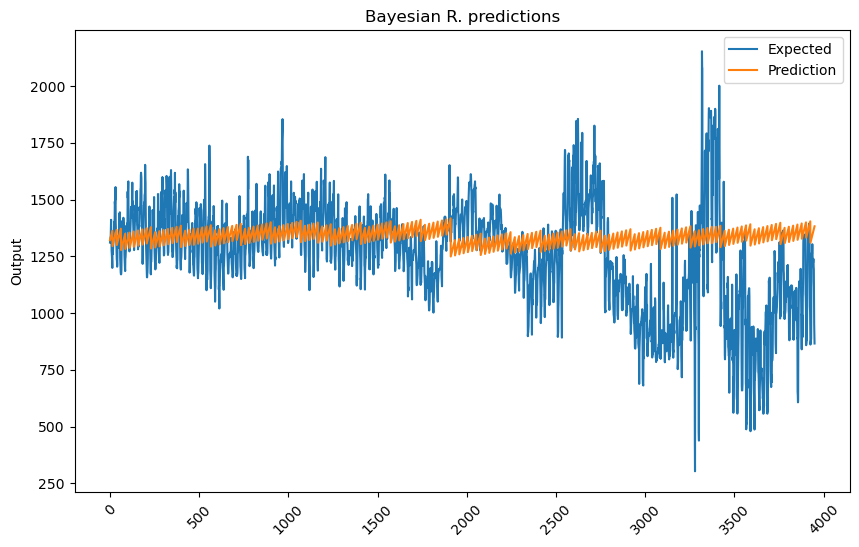

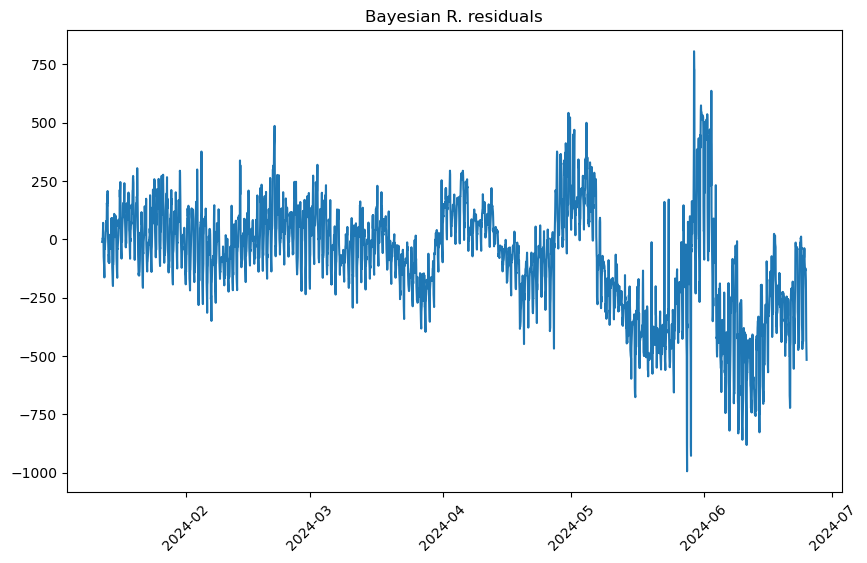

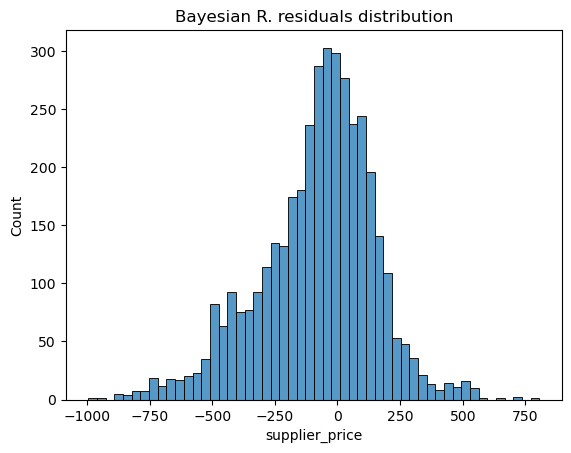

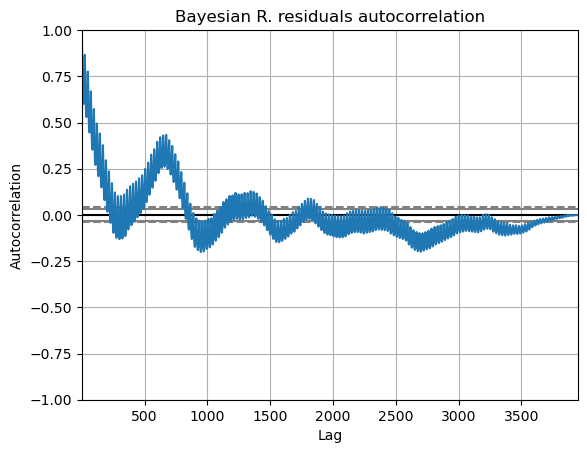

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
176.44223865486038

Jarque-Bera:           NOT Normal
219.6977533102503

Kolmogorov-Smirnov:    NOT Normal
0.0725431164568332

Lilliefors:            NOT Normal
0.0725431164568332

Shapiro-Wilk:          NOT Normal
0.9788301587104797

Anderson–Darling:      NOT Normal
30.798364403777214

----------------
PAR model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


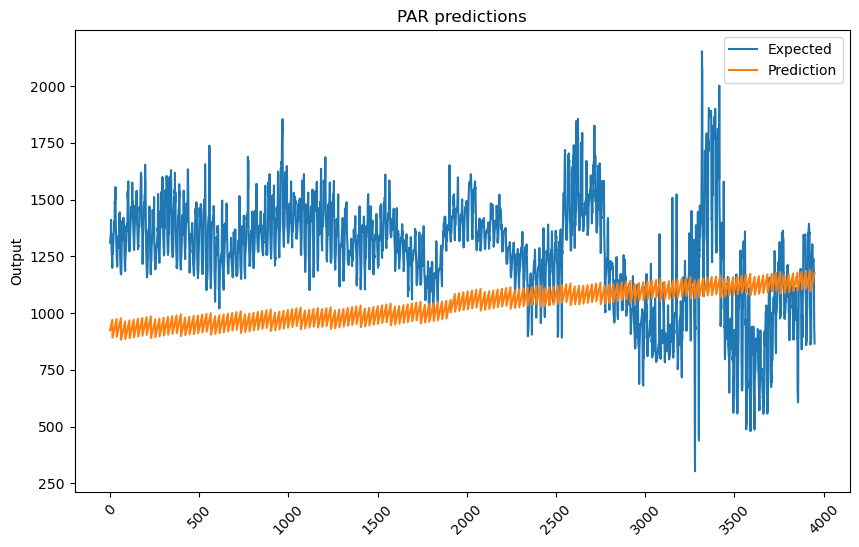

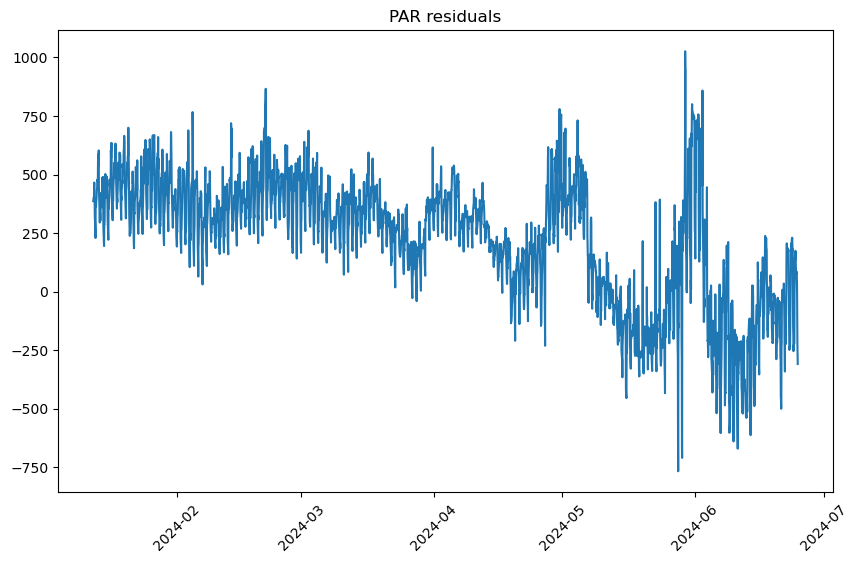

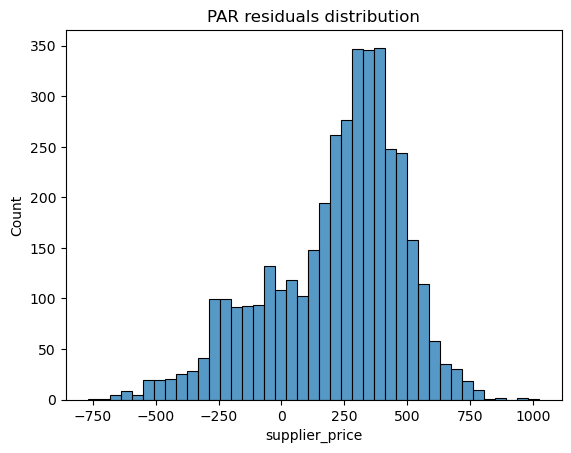

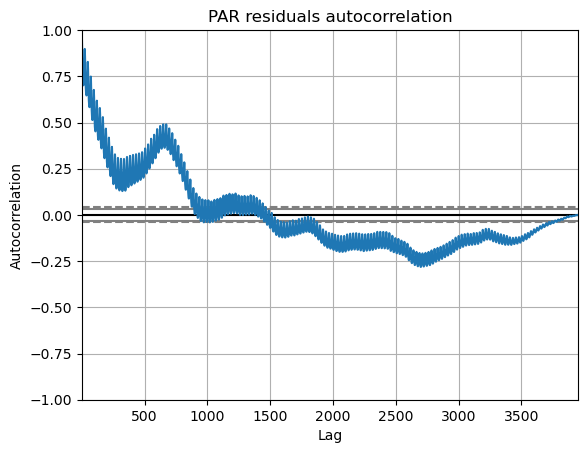

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
271.9155009130712

Jarque-Bera:           NOT Normal
329.93909873671237

Kolmogorov-Smirnov:    NOT Normal
0.09826837081599366

Lilliefors:            NOT Normal
0.09826837081599366

Shapiro-Wilk:          NOT Normal
0.9582117795944214

Anderson–Darling:      NOT Normal
63.061665476697726

----------------
SGD model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


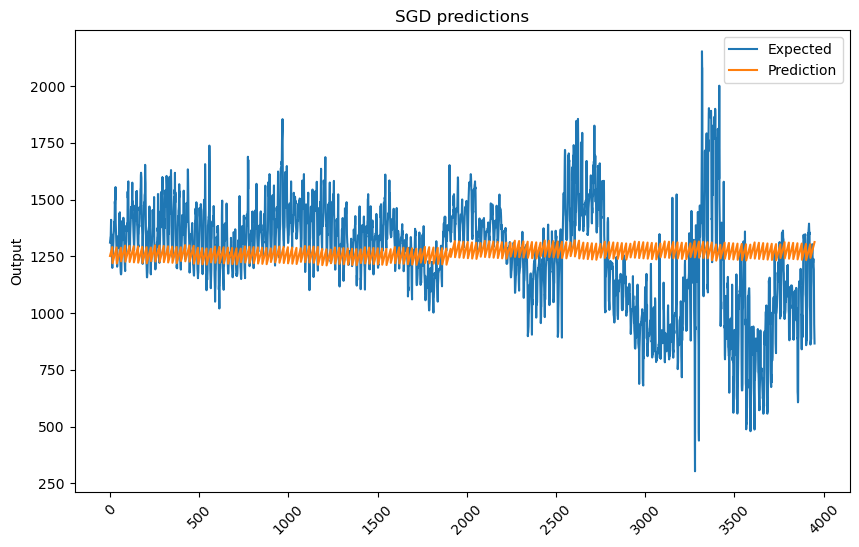

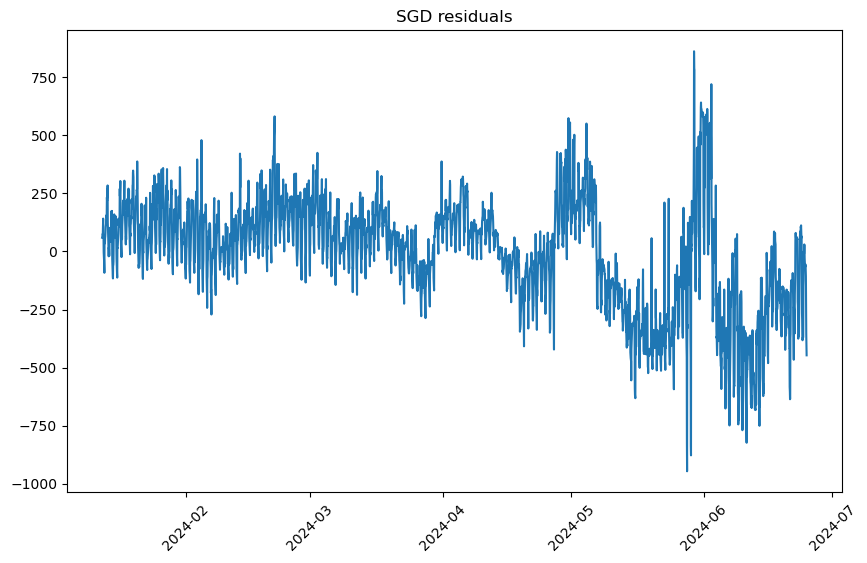

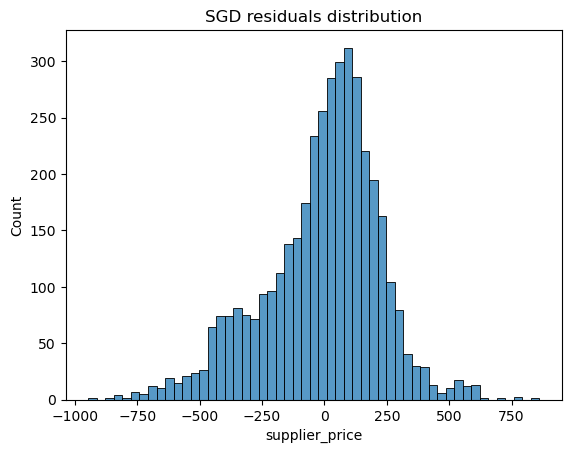

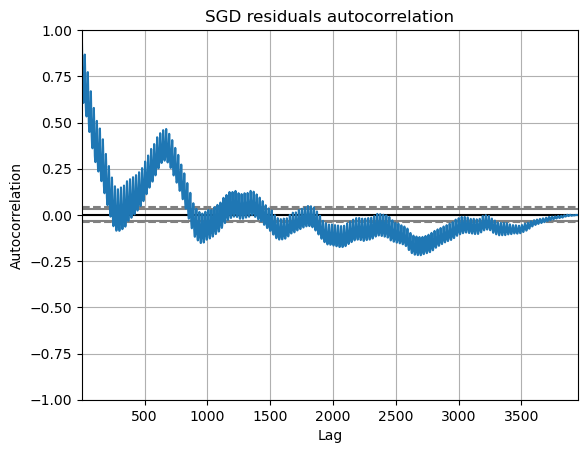

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
200.36052328397147

Jarque-Bera:           NOT Normal
244.6323838961921

Kolmogorov-Smirnov:    NOT Normal
0.0781931324375782

Lilliefors:            NOT Normal
0.0781931324375782

Shapiro-Wilk:          NOT Normal
0.9737070798873901

Anderson–Darling:      NOT Normal
40.51083374117661

----------------
SVR model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


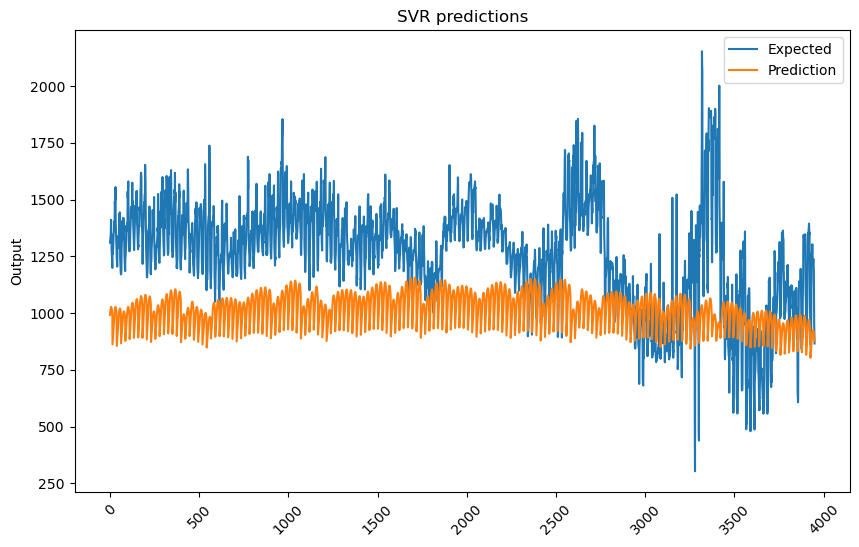

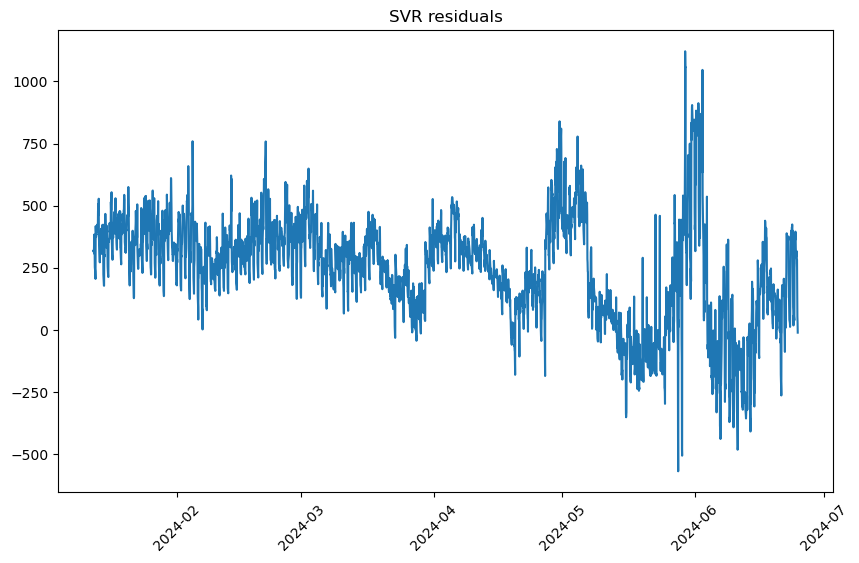

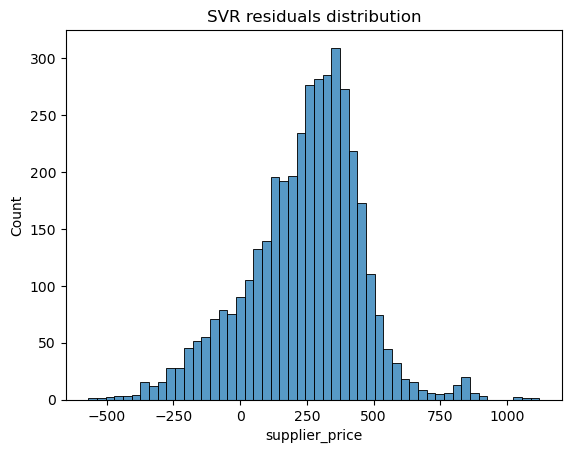

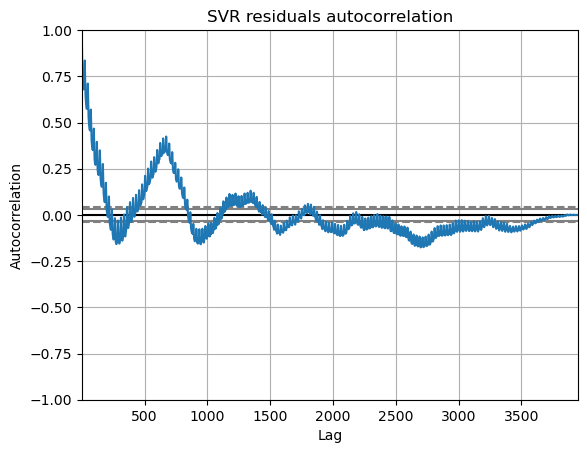

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
109.28196400947873

Jarque-Bera:           NOT Normal
150.92587543705764

Kolmogorov-Smirnov:    NOT Normal
0.06252064817889702

Lilliefors:            NOT Normal
0.06252064817889702

Shapiro-Wilk:          NOT Normal
0.9795038104057312

Anderson–Darling:      NOT Normal
28.75863116210394

----------------
Lin. SVR model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


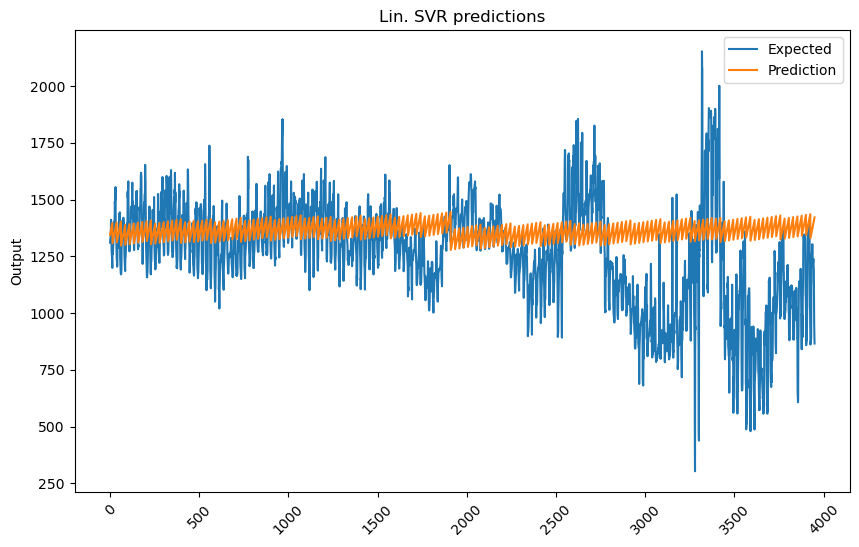

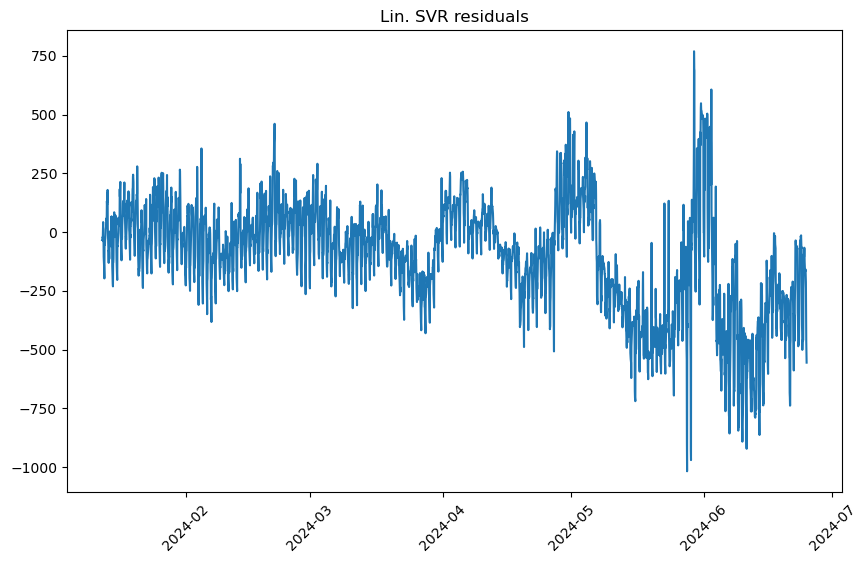

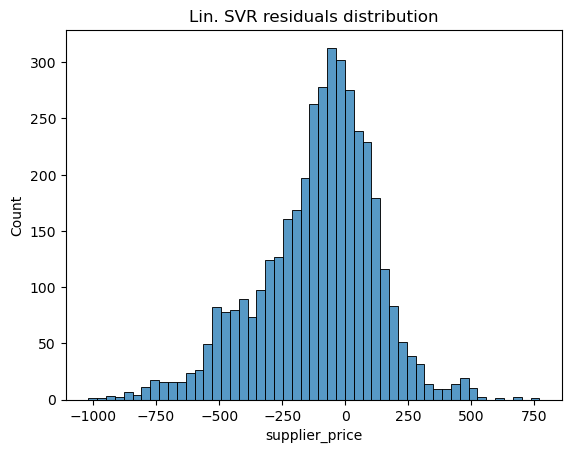

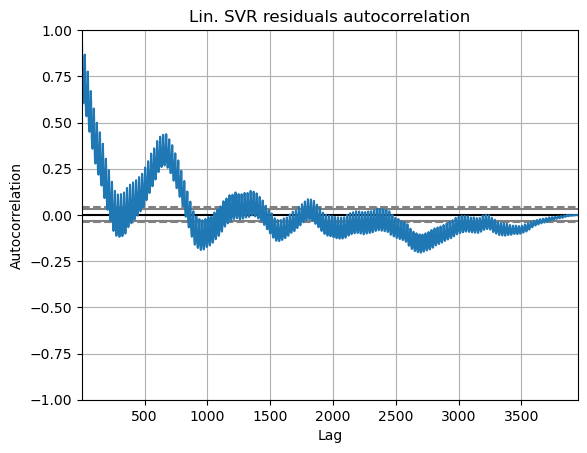

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
184.3429864206745

Jarque-Bera:           NOT Normal
227.2090800437816

Kolmogorov-Smirnov:    NOT Normal
0.07350999656971141

Lilliefors:            NOT Normal
0.07350999656971141

Shapiro-Wilk:          NOT Normal
0.9777210354804993

Anderson–Darling:      NOT Normal
32.65266168515245

----------------
KNN model...


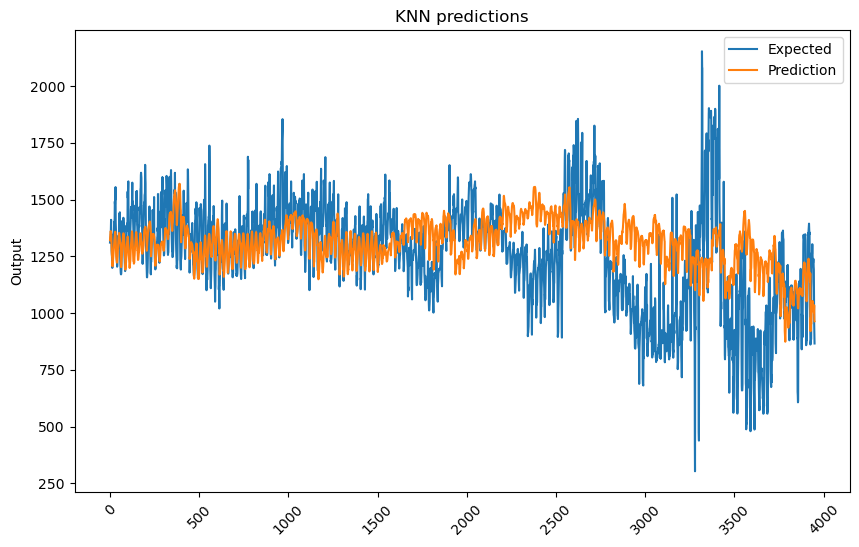

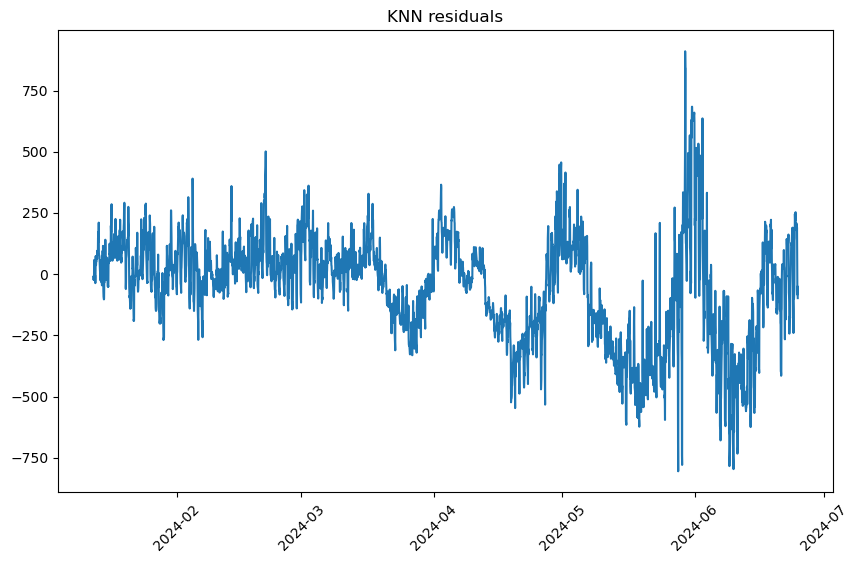

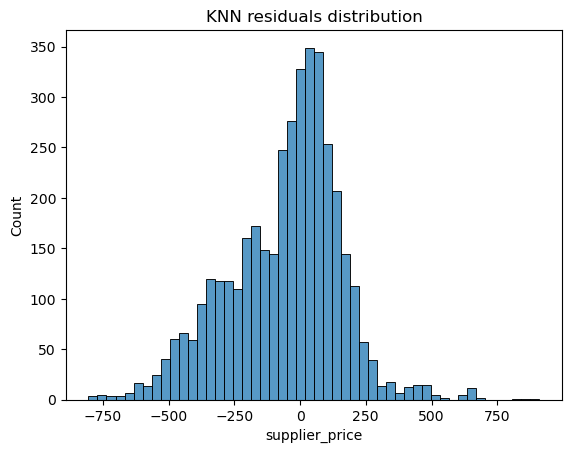

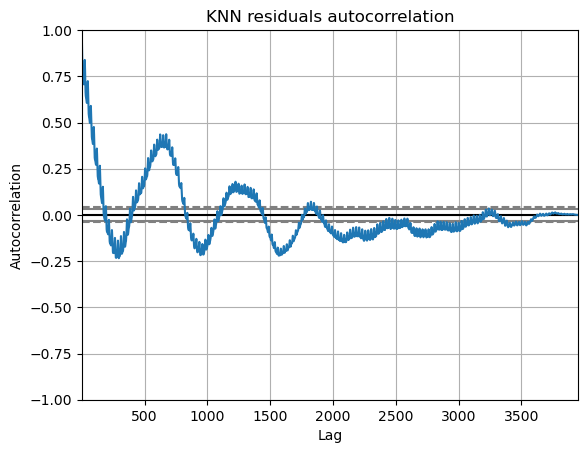

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
87.50697301967762

Jarque-Bera:           NOT Normal
115.03231303743826

Kolmogorov-Smirnov:    NOT Normal
0.08138218819539161

Lilliefors:            NOT Normal
0.08138218819539161

Shapiro-Wilk:          NOT Normal
0.9762976169586182

Anderson–Darling:      NOT Normal
37.489921714929096

----------------
CART model...


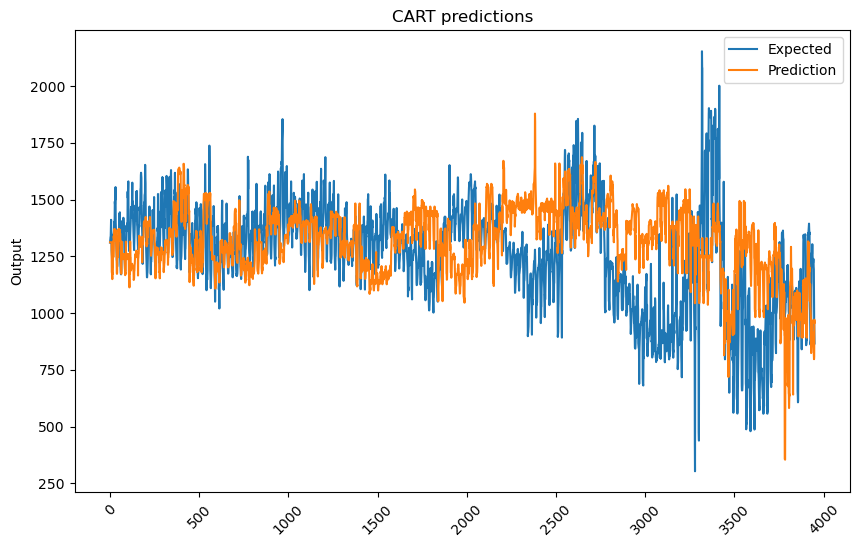

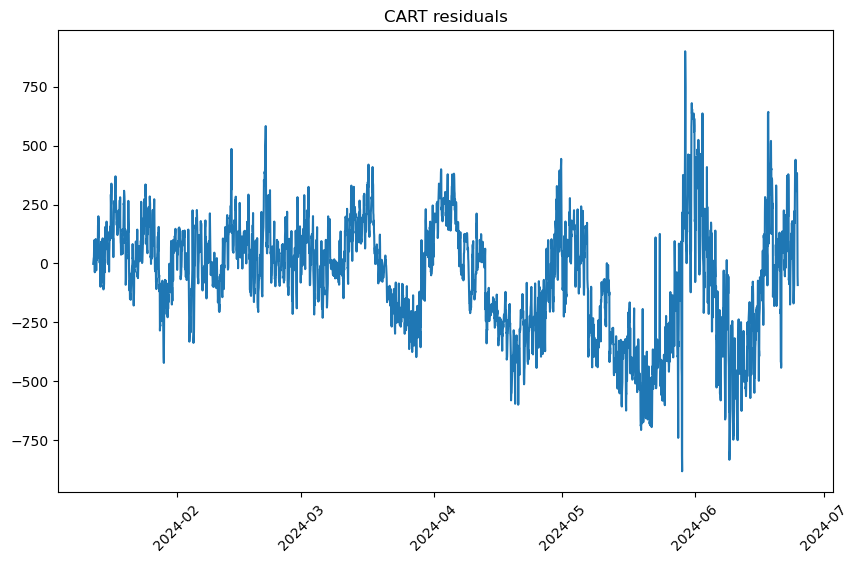

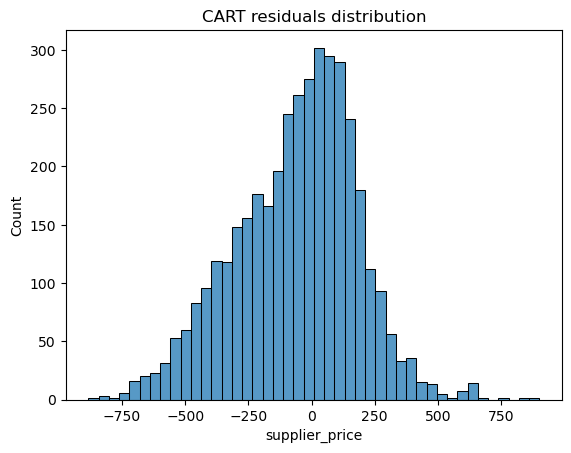

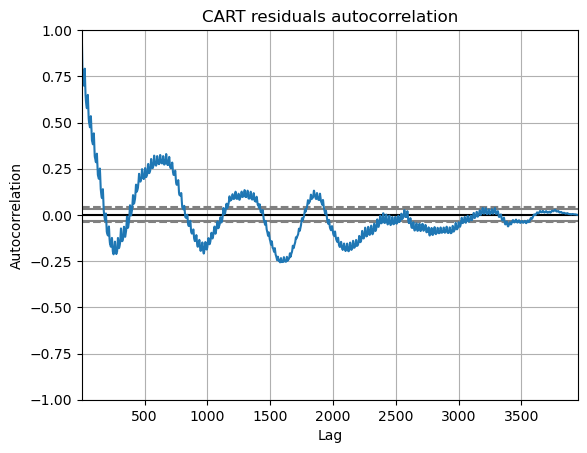

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
46.04610414052377

Jarque-Bera:           NOT Normal
47.37041639214655

Kolmogorov-Smirnov:    NOT Normal
0.05123051571588949

Lilliefors:            NOT Normal
0.05123051571588949

Shapiro-Wilk:          NOT Normal
0.9890393614768982

Anderson–Darling:      NOT Normal
17.798711393027588

----------------
RF model...


C:\Users\dexp\AppData\Local\Temp\ipykernel_12896\2816450191.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


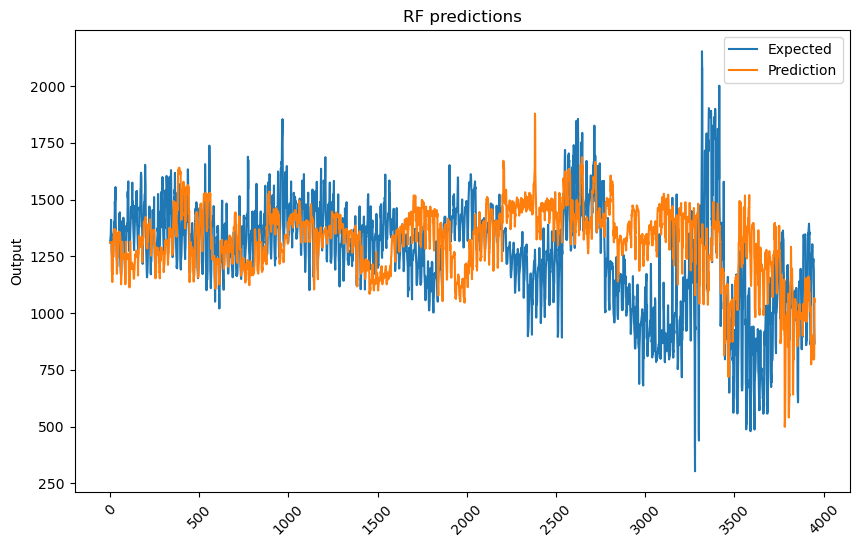

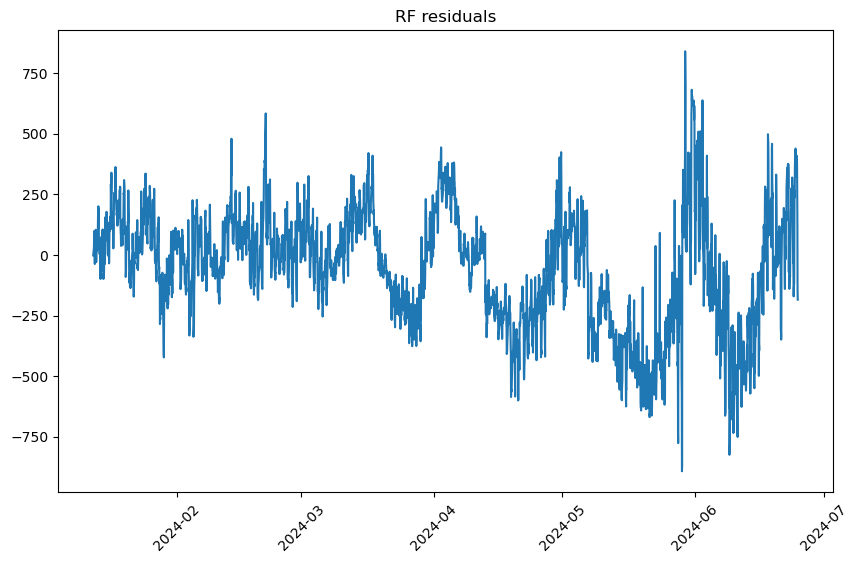

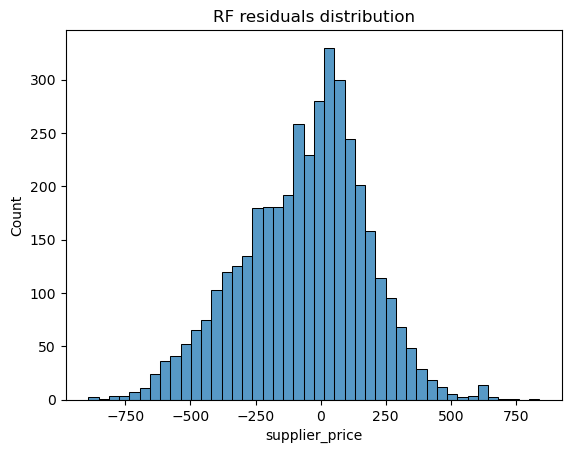

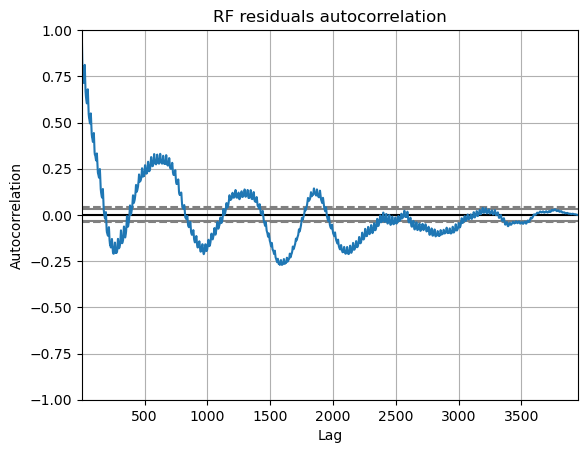

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
39.80541510943087

Jarque-Bera:           NOT Normal
40.76908337003965

Kolmogorov-Smirnov:    NOT Normal
0.053170499700886276

Lilliefors:            NOT Normal
0.053170499700886276

Shapiro-Wilk:          NOT Normal
0.9913116097450256

Anderson–Darling:      NOT Normal
14.199031298773662

----------------
RF w/B. model...


C:\Users\dexp\AppData\Local\Temp\ipykernel_12896\2816450191.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


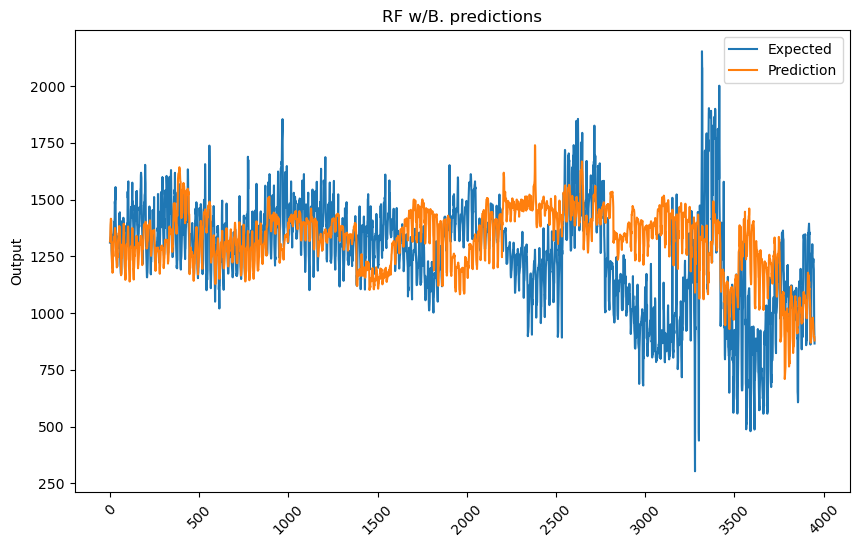

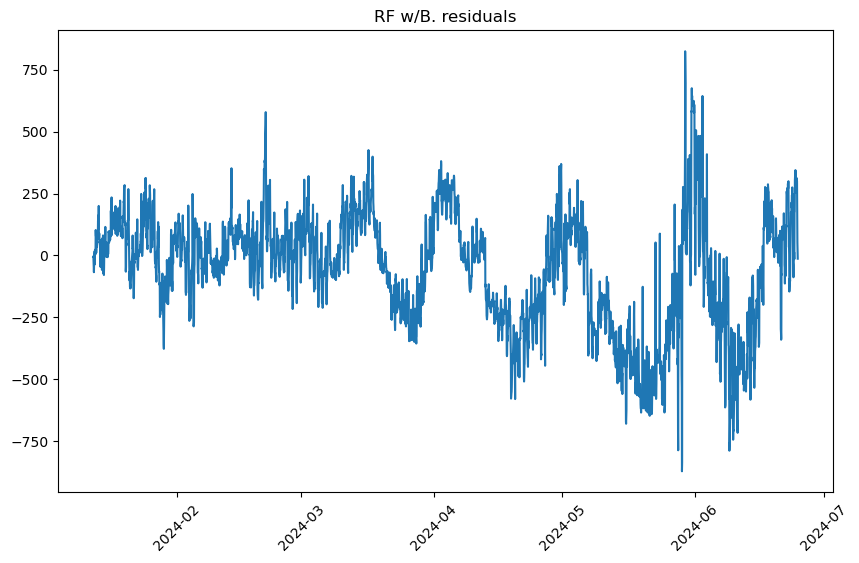

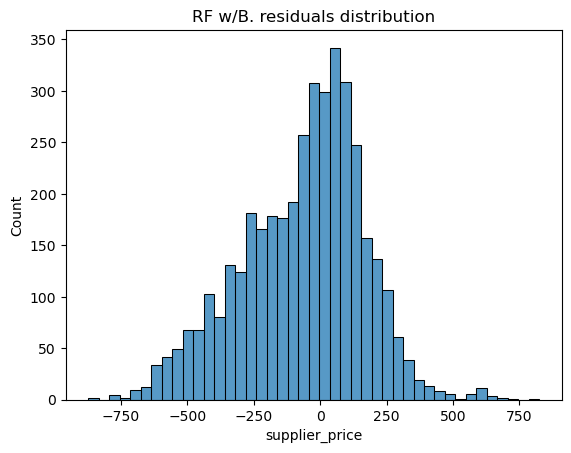

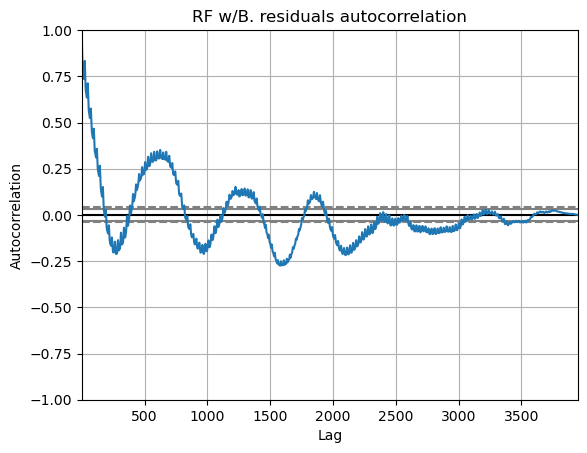

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
68.95933510678242

Jarque-Bera:           NOT Normal
72.17945626261155

Kolmogorov-Smirnov:    NOT Normal
0.06758278553146407

Lilliefors:            NOT Normal
0.06758278553146407

Shapiro-Wilk:          NOT Normal
0.9839698672294617

Anderson–Darling:      NOT Normal
25.661268397191634

----------------
XT model...


C:\Users\dexp\AppData\Local\Temp\ipykernel_12896\2816450191.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


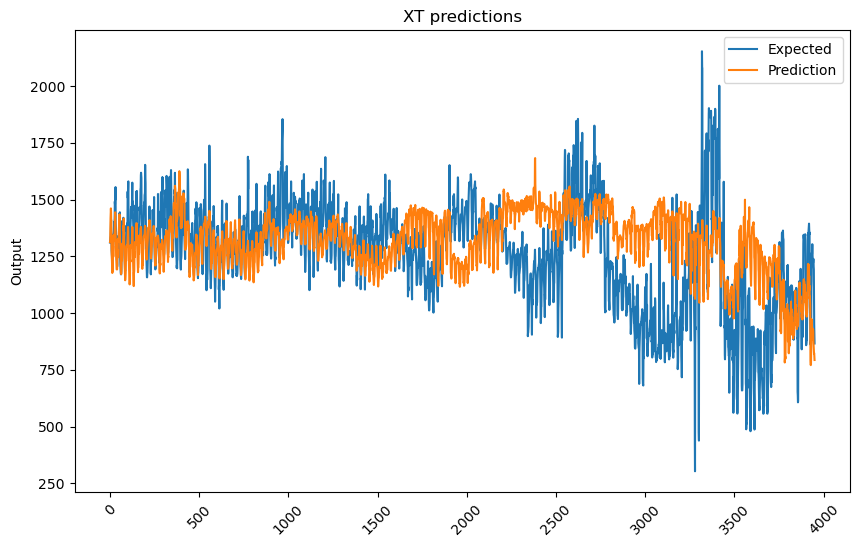

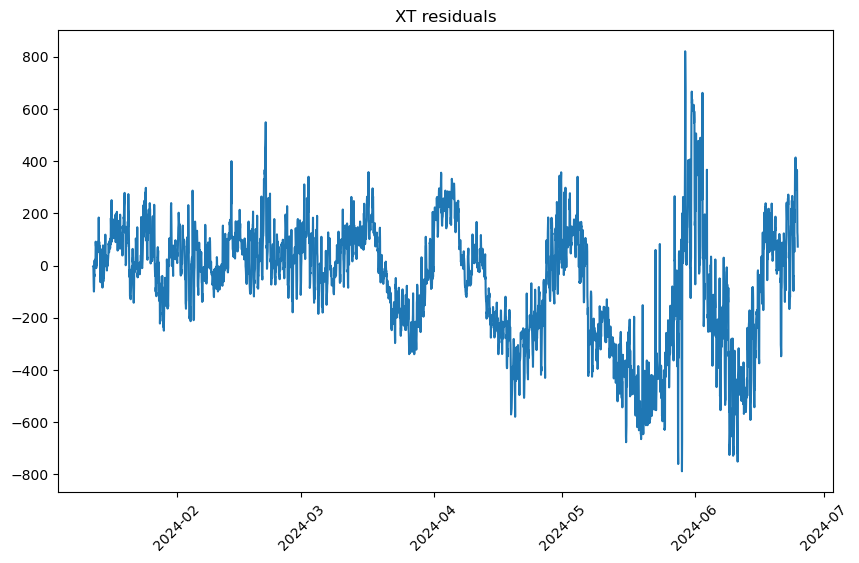

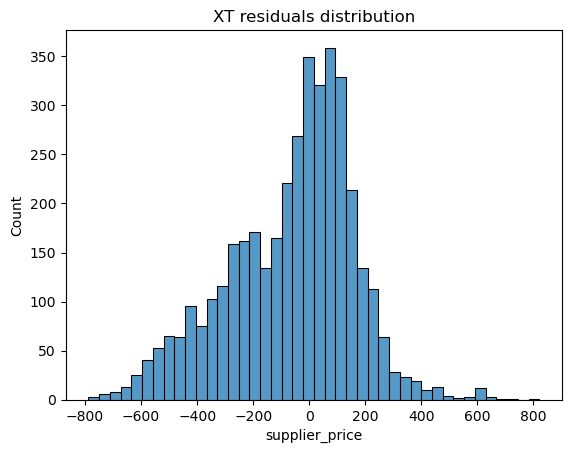

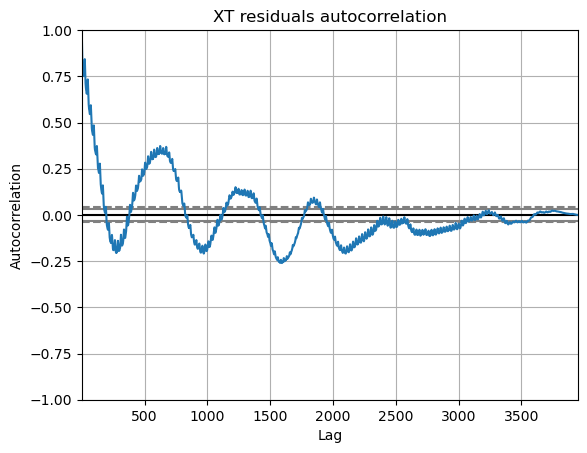

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
101.70348830198749

Jarque-Bera:           NOT Normal
109.10363020979717

Kolmogorov-Smirnov:    NOT Normal
0.08508845779048724

Lilliefors:            NOT Normal
0.08508845779048724

Shapiro-Wilk:          NOT Normal
0.9753789901733398

Anderson–Darling:      NOT Normal
40.71298289165043

----------------
XT w/B. model...


C:\Users\dexp\AppData\Local\Temp\ipykernel_12896\2816450191.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


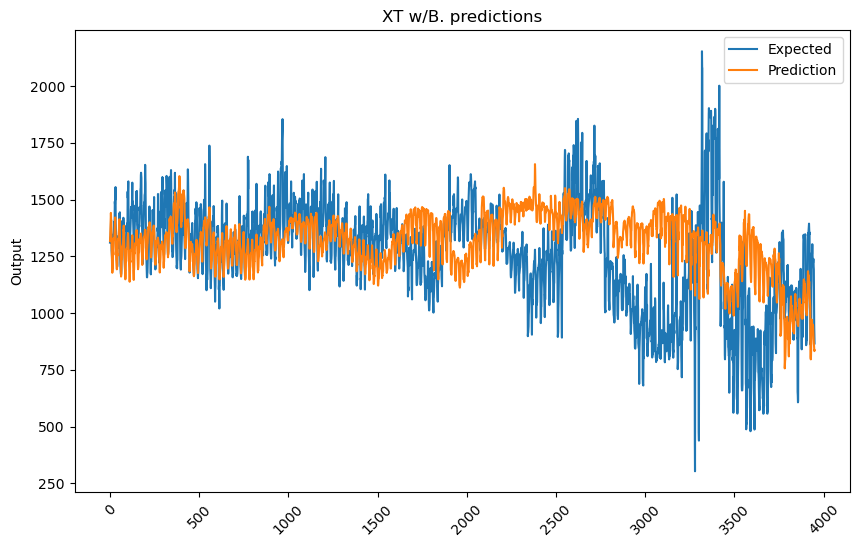

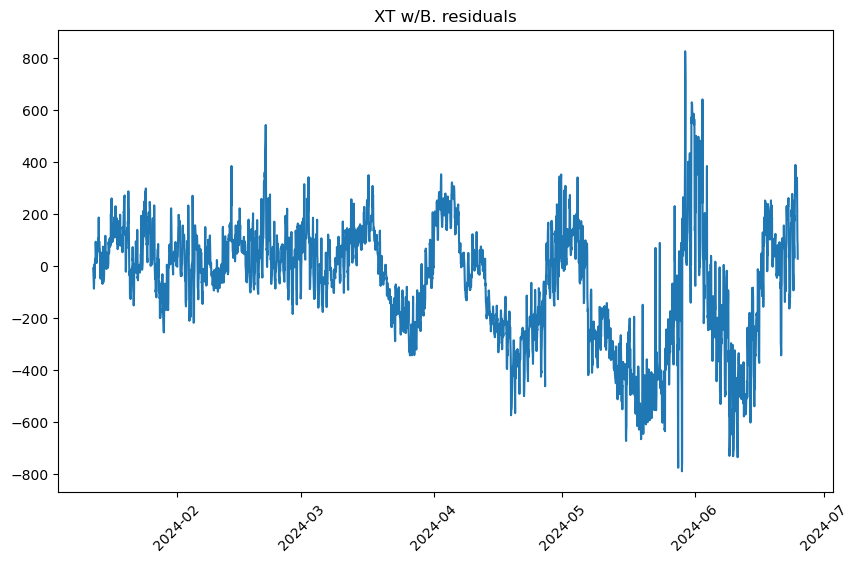

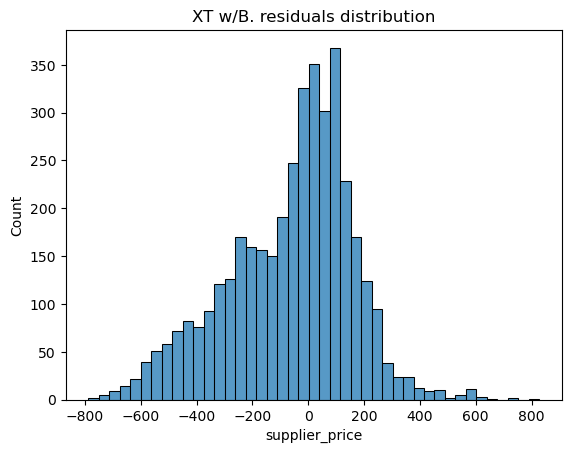

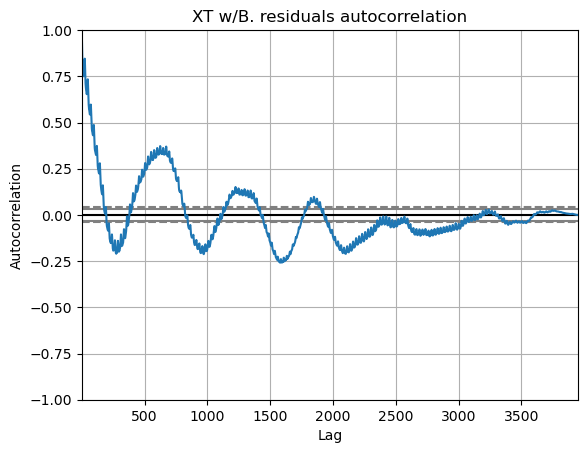

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
104.16537681943309

Jarque-Bera:           NOT Normal
111.91490208865882

Kolmogorov-Smirnov:    NOT Normal
0.08572145148827498

Lilliefors:            NOT Normal
0.08572145148827498

Shapiro-Wilk:          NOT Normal
0.9760263562202454

Anderson–Darling:      NOT Normal
39.656047033296545

----------------
BAG model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


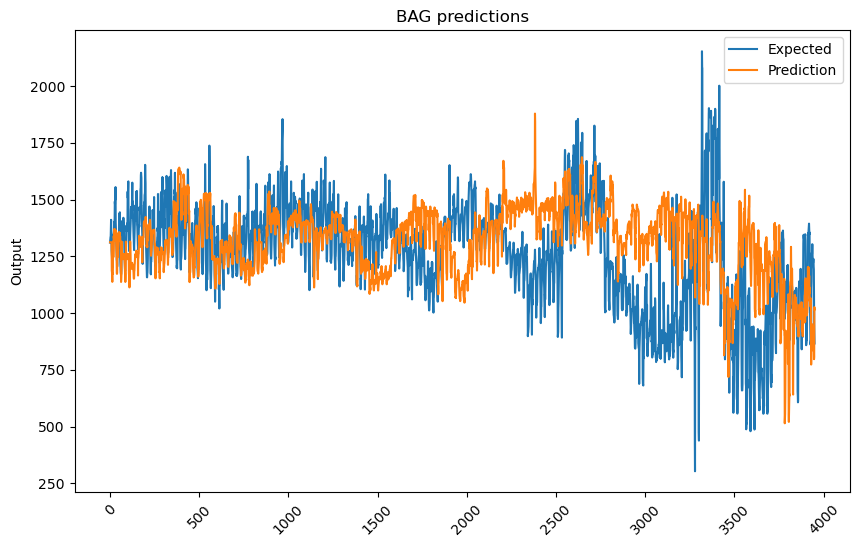

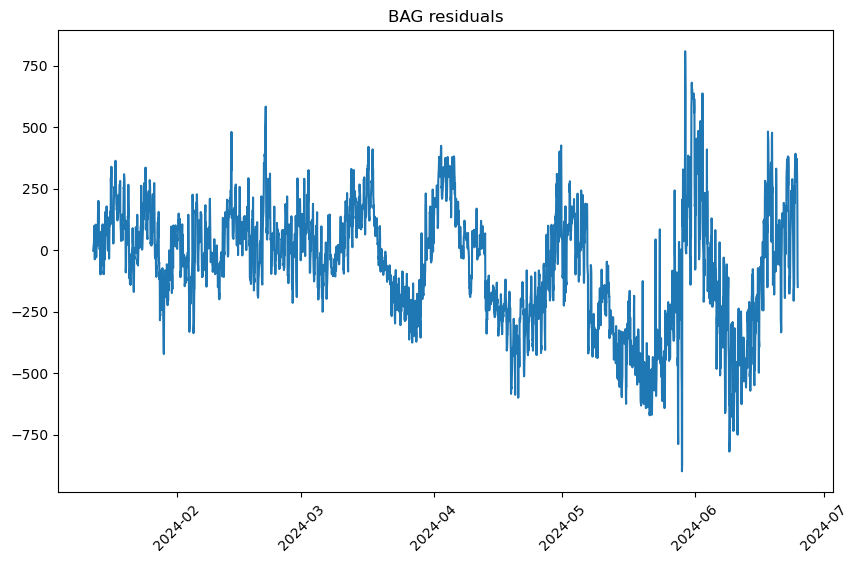

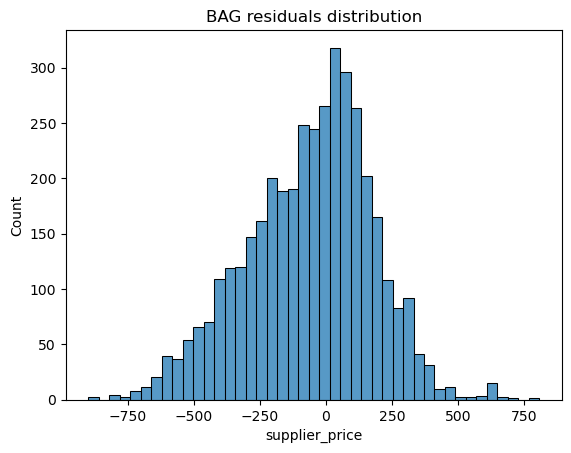

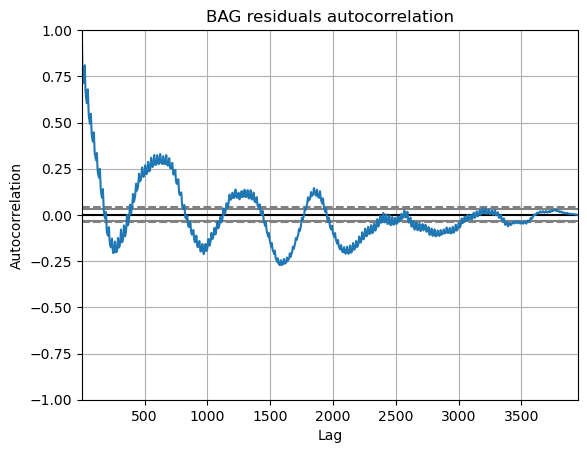

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
43.45860110804386

Jarque-Bera:           NOT Normal
44.70561986425539

Kolmogorov-Smirnov:    NOT Normal
0.05058689021244789

Lilliefors:            NOT Normal
0.05058689021244789

Shapiro-Wilk:          NOT Normal
0.991066575050354

Anderson–Darling:      NOT Normal
14.070774403977339

----------------
BAG w/B. model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


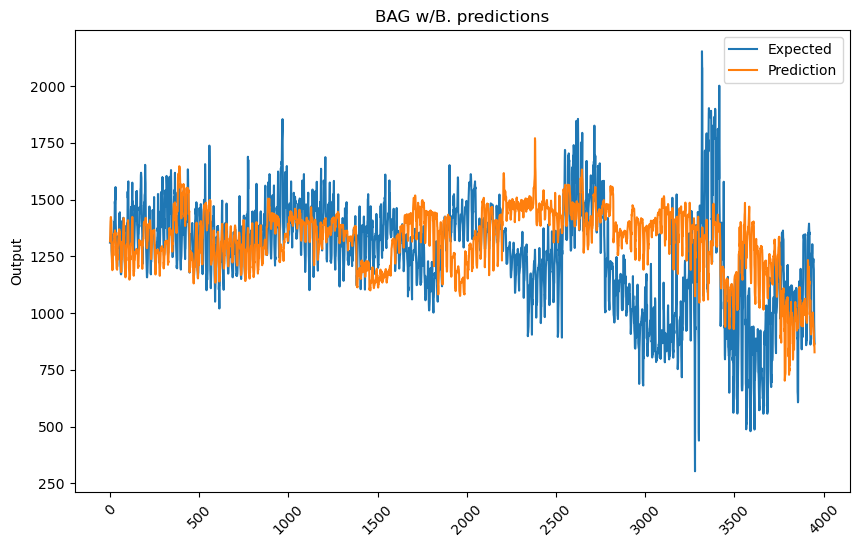

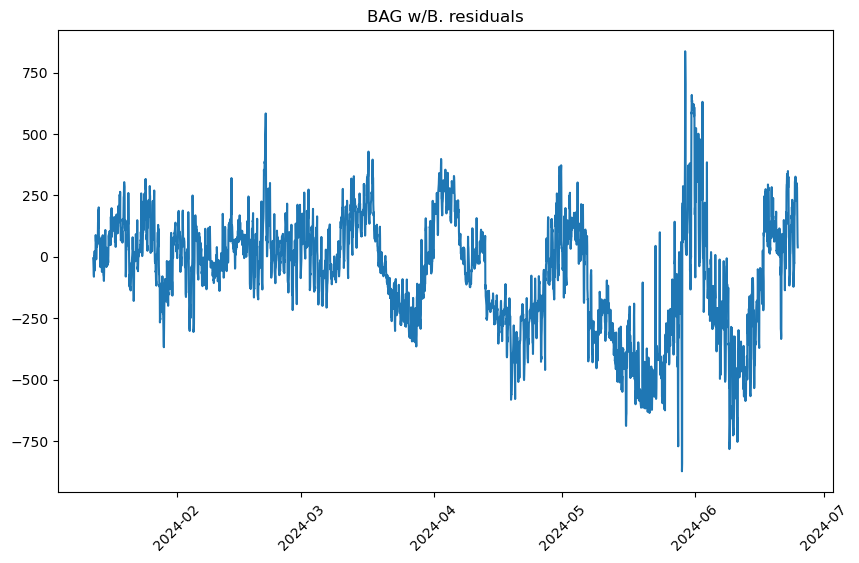

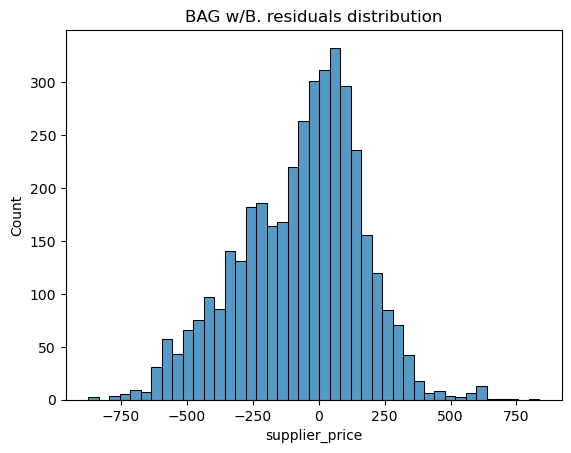

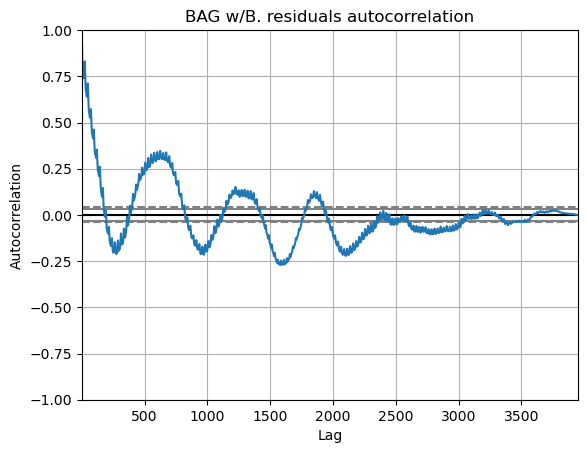

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
60.11928896117647

Jarque-Bera:           NOT Normal
62.544543298392036

Kolmogorov-Smirnov:    NOT Normal
0.06252635517948918

Lilliefors:            NOT Normal
0.06252635517948918

Shapiro-Wilk:          NOT Normal
0.9854418039321899

Anderson–Darling:      NOT Normal
23.38139321538938

----------------
ADA model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


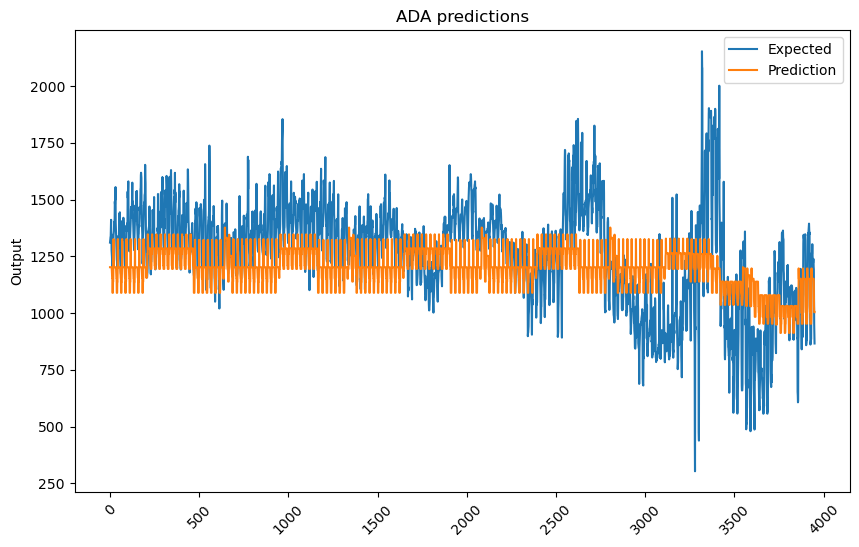

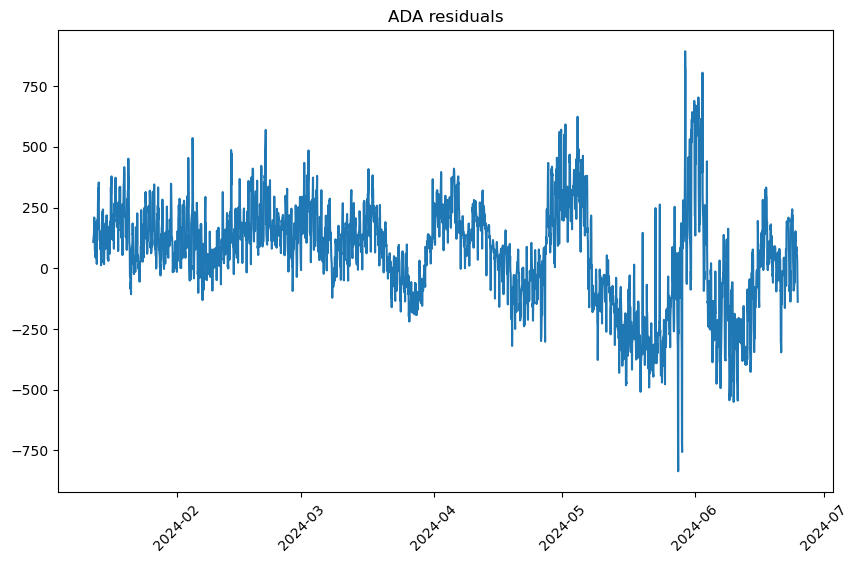

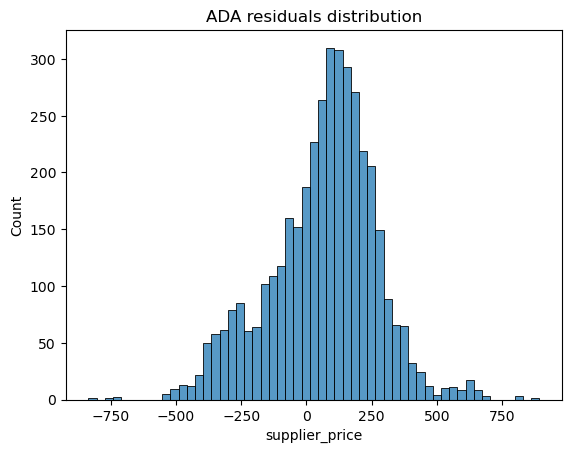

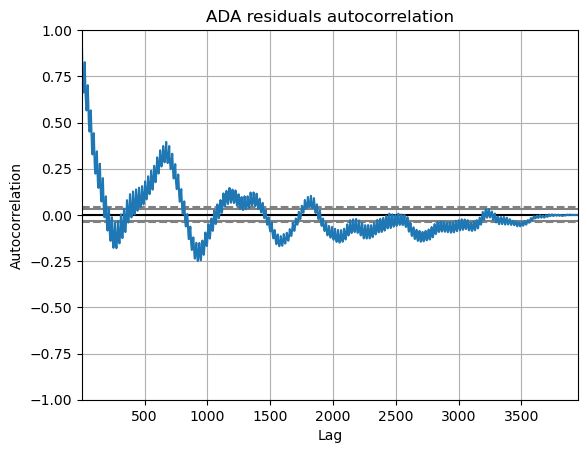

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
94.14646335577392

Jarque-Bera:           NOT Normal
114.55860029005956

Kolmogorov-Smirnov:    NOT Normal
0.0667639766182564

Lilliefors:            NOT Normal
0.0667639766182564

Shapiro-Wilk:          NOT Normal
0.9819791913032532

Anderson–Darling:      NOT Normal
28.018709947632942

----------------
HGBoost model...


C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


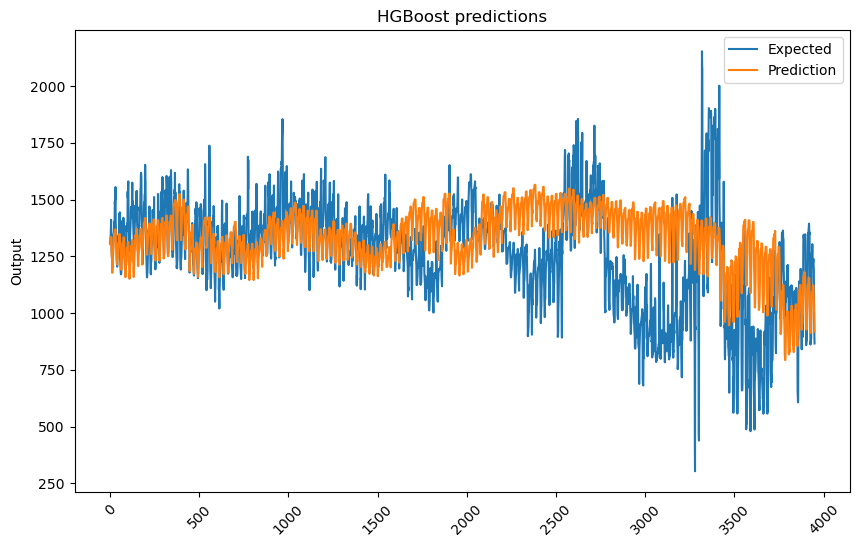

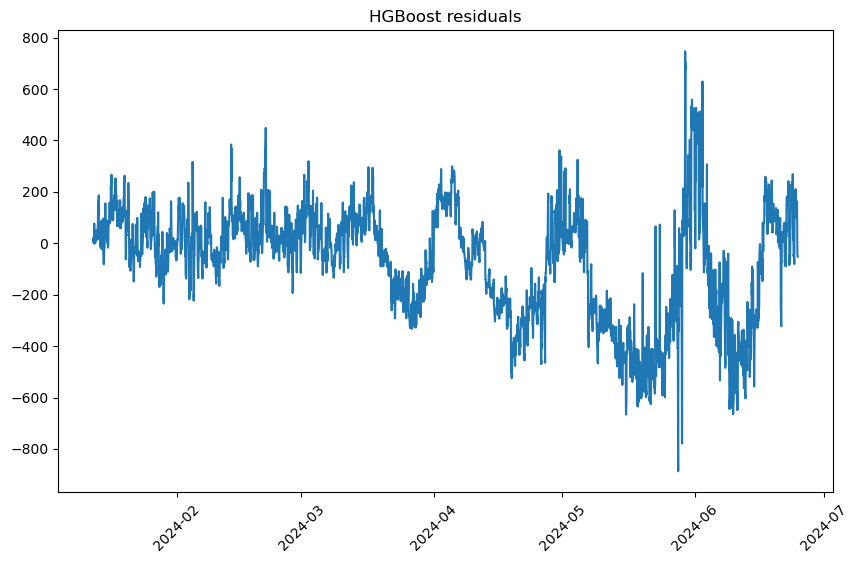

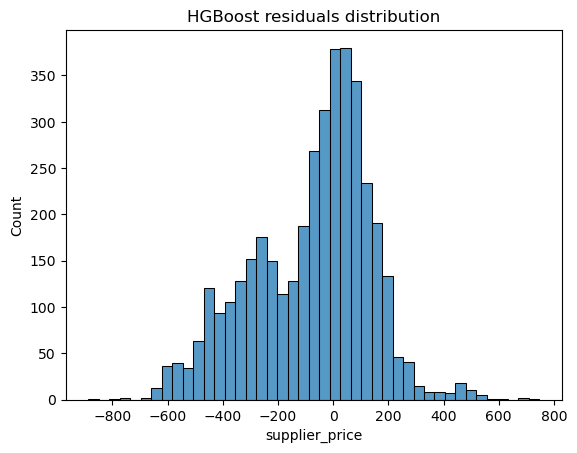

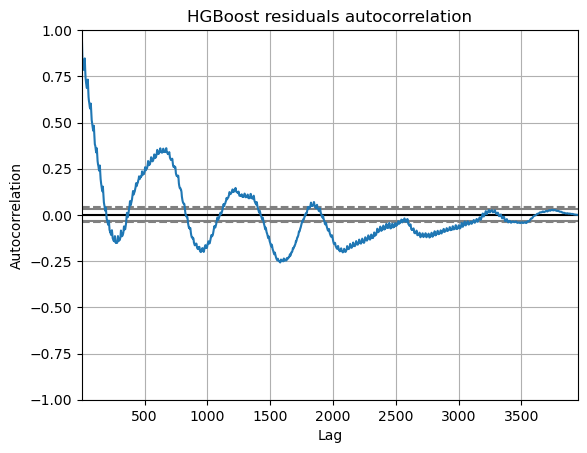

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
98.0831139783924

Jarque-Bera:           NOT Normal
105.1384299337656

Kolmogorov-Smirnov:    NOT Normal
0.0959625546117262

Lilliefors:            NOT Normal
0.0959625546117262

Shapiro-Wilk:          NOT Normal
0.9705435037612915

Anderson–Darling:      NOT Normal
51.685083208132255

----------------
XGBoost model...


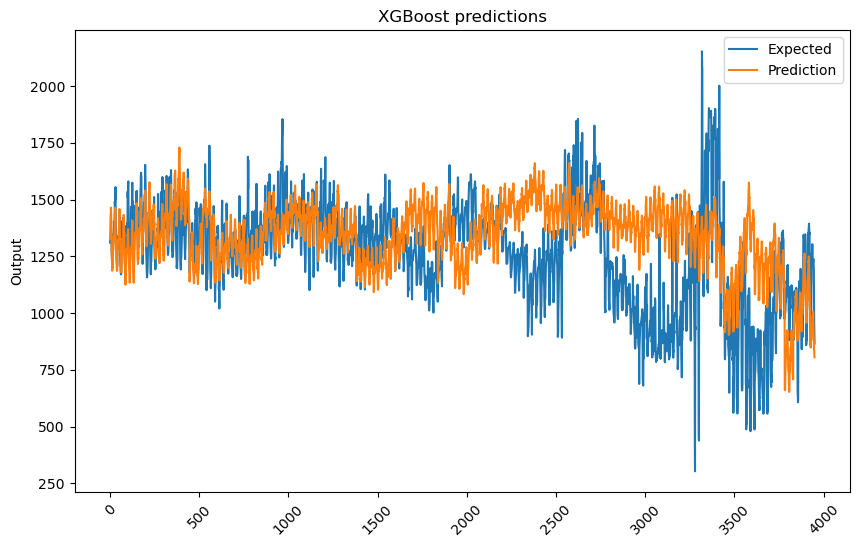

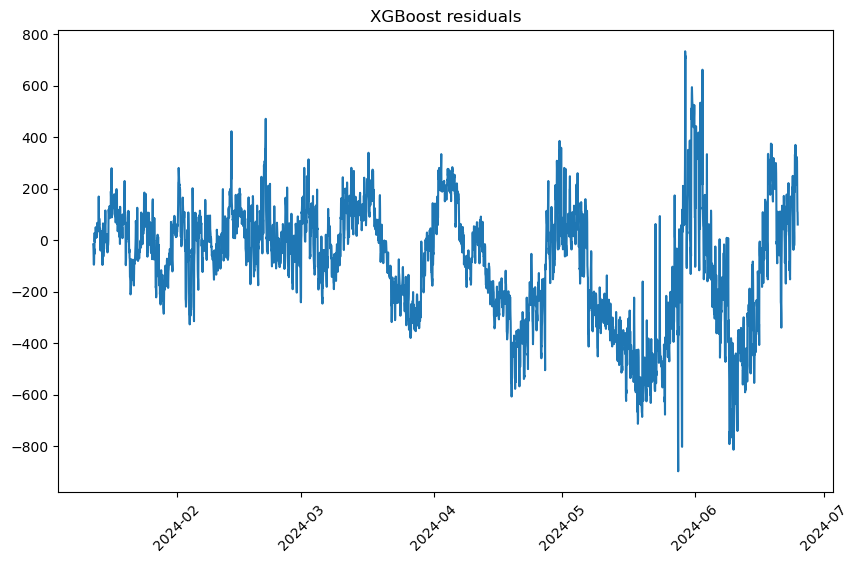

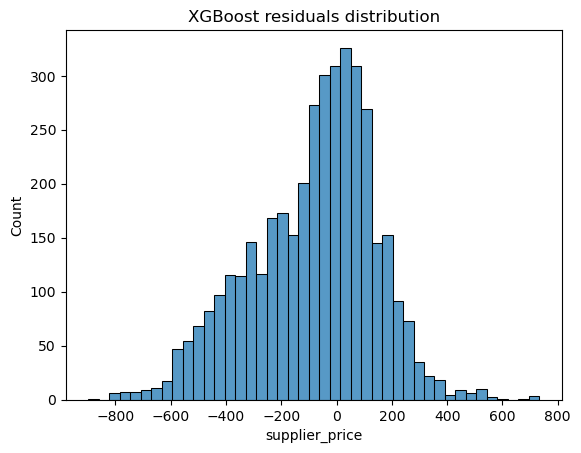

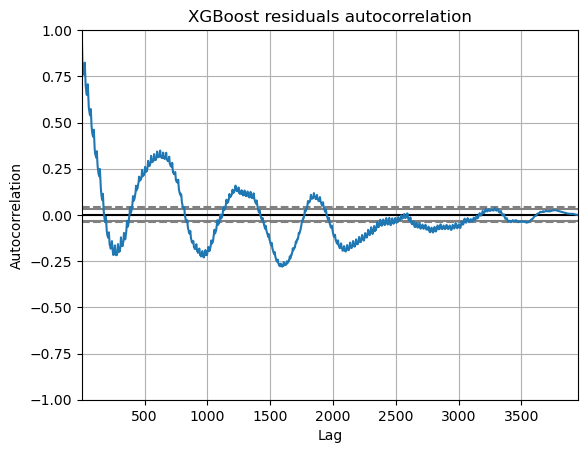

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
95.20341809284444

Jarque-Bera:           NOT Normal
101.6162482510124

Kolmogorov-Smirnov:    NOT Normal
0.0722428322909694

Lilliefors:            NOT Normal
0.0722428322909694

Shapiro-Wilk:          NOT Normal
0.9821434617042542

Anderson–Darling:      NOT Normal
29.912051608552247

----------------
CatBoost model...


Default metric period is 5 because MAE is/are not implemented for GPU


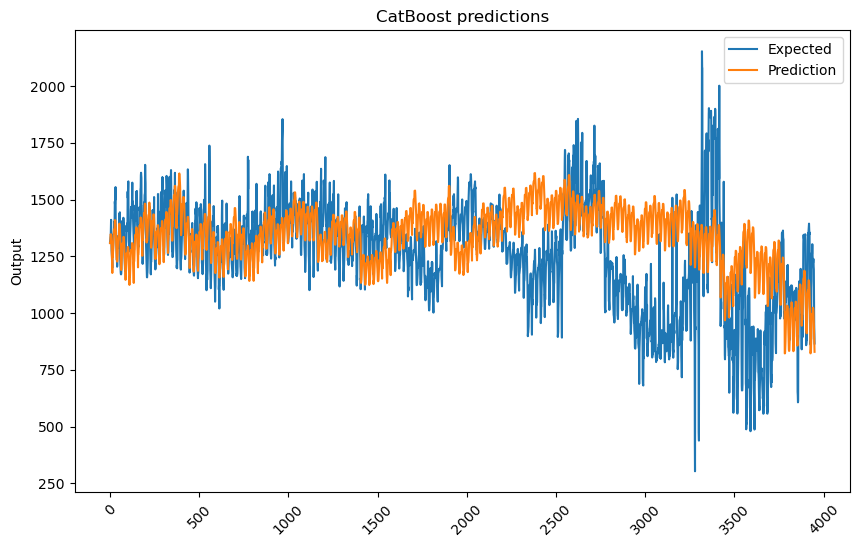

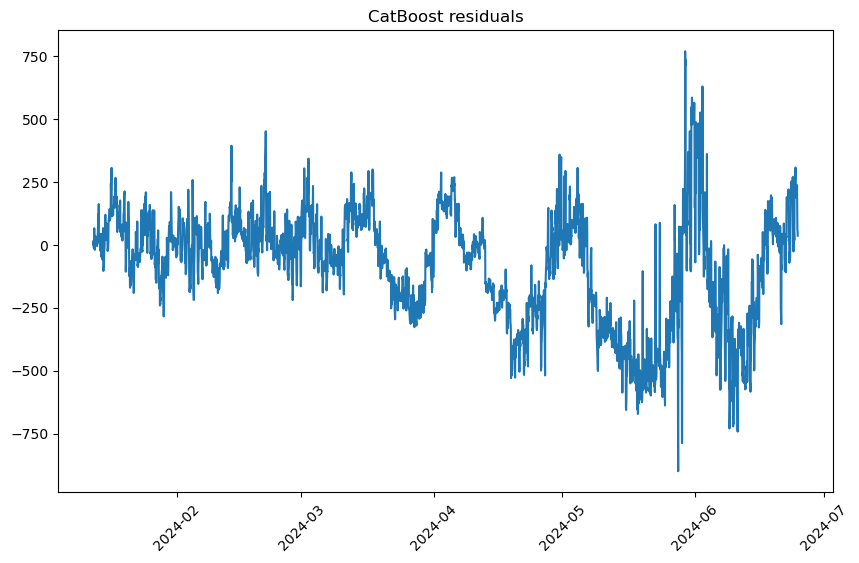

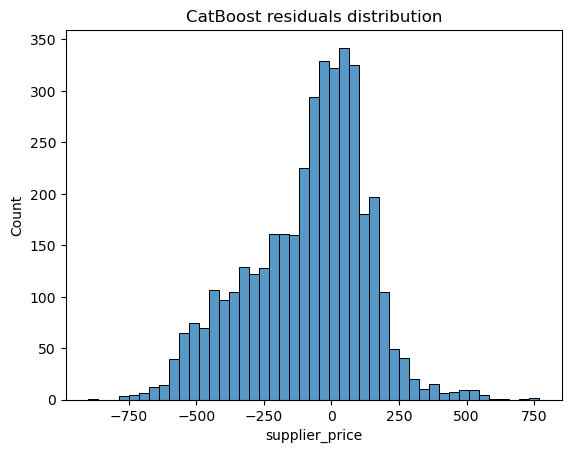

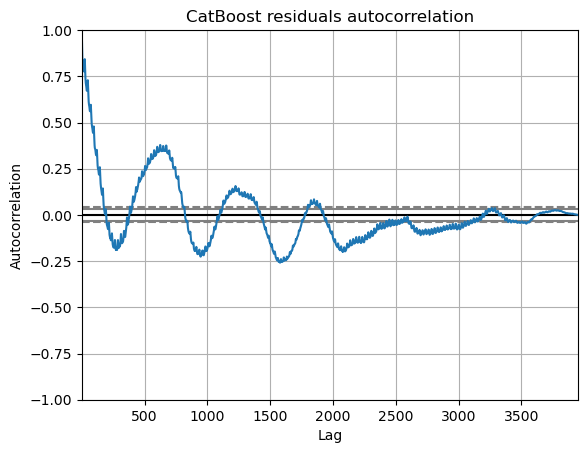

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
94.20379318106318

Jarque-Bera:           NOT Normal
100.46803666115876

Kolmogorov-Smirnov:    NOT Normal
0.08549079309123925

Lilliefors:            NOT Normal
0.08549079309123925

Shapiro-Wilk:          NOT Normal
0.9743785262107849

Anderson–Darling:      NOT Normal
43.38390712527962

----------------
FFNN-10-1 model...
700/700 [==============================] - 6s 6ms/step - loss: 0.7388


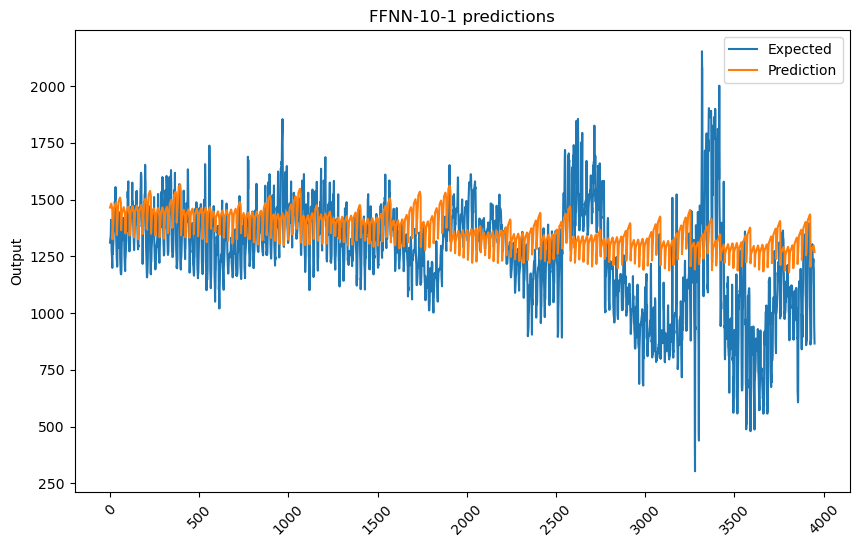

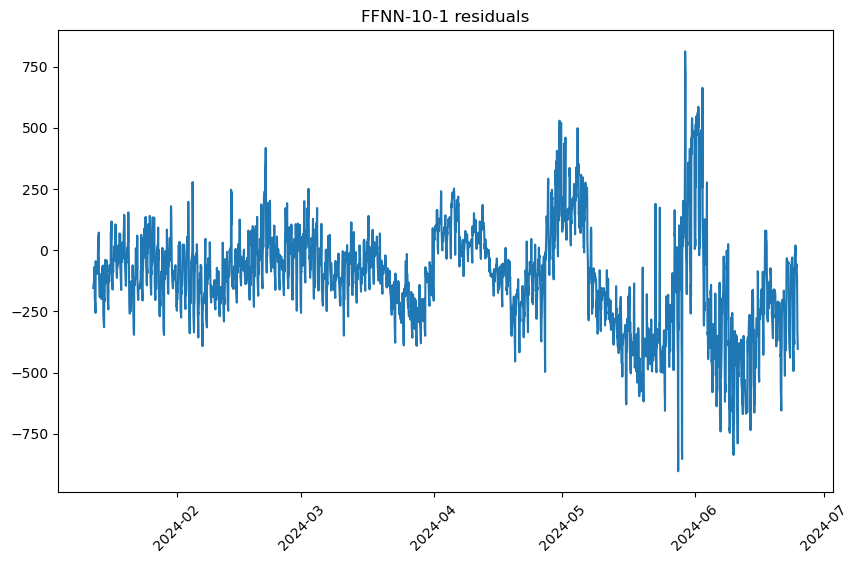

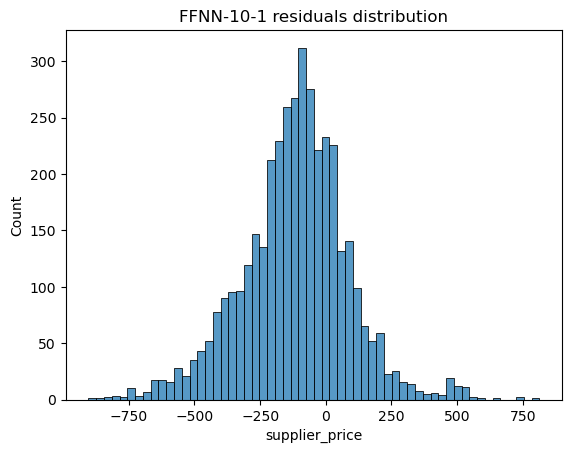

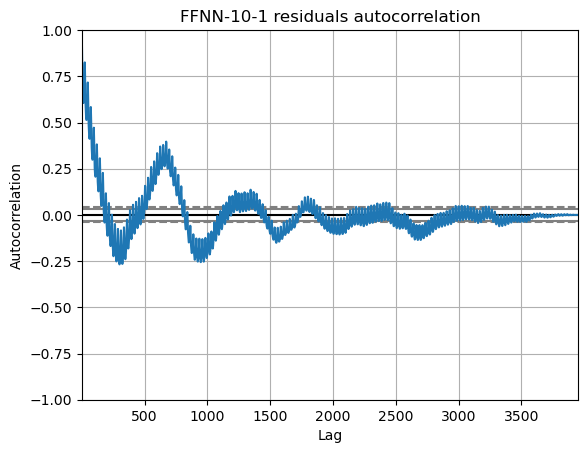

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
95.0599300539964

Jarque-Bera:           NOT Normal
217.61423843635734

Kolmogorov-Smirnov:    NOT Normal
0.046733480165187635

Lilliefors:            NOT Normal
0.046733480165187635

Shapiro-Wilk:          NOT Normal
0.9855531454086304

Anderson–Darling:      NOT Normal
16.11128964048885

----------------
FFNN-10-5-1 model...
700/700 [==============================] - 6s 8ms/step - loss: 0.6980


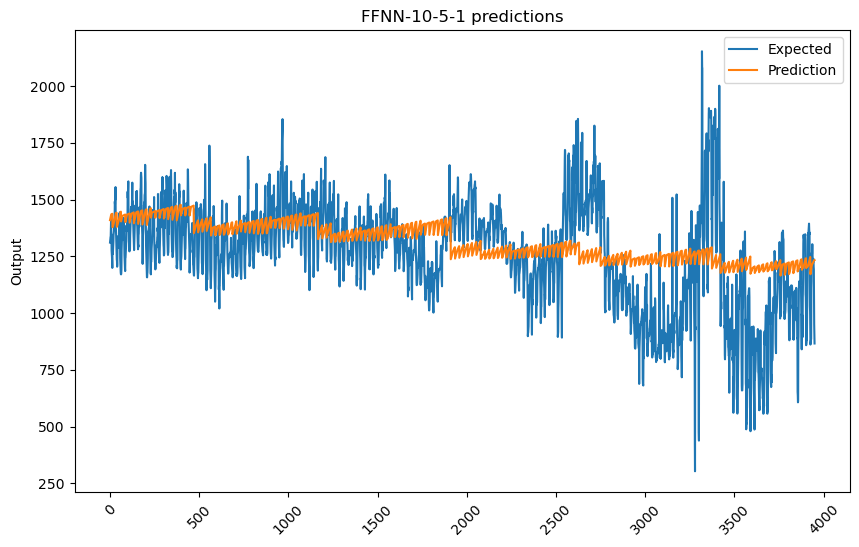

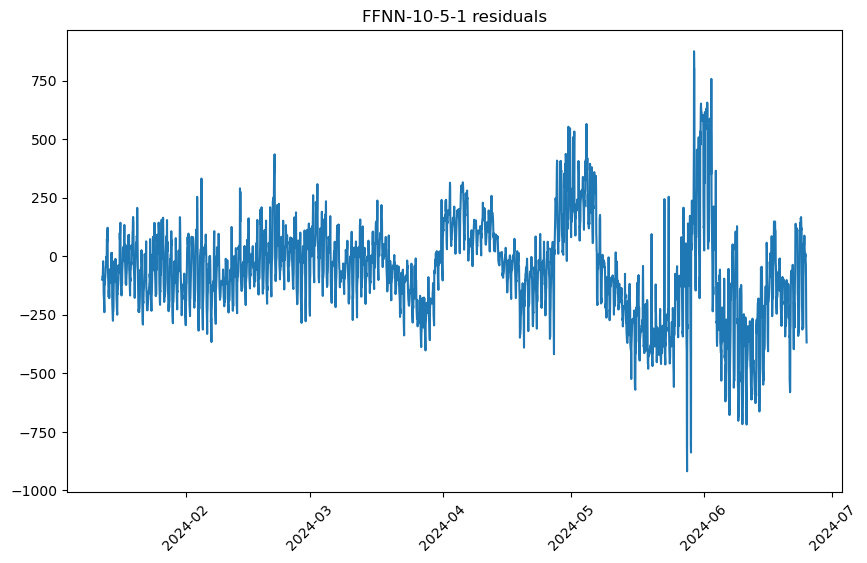

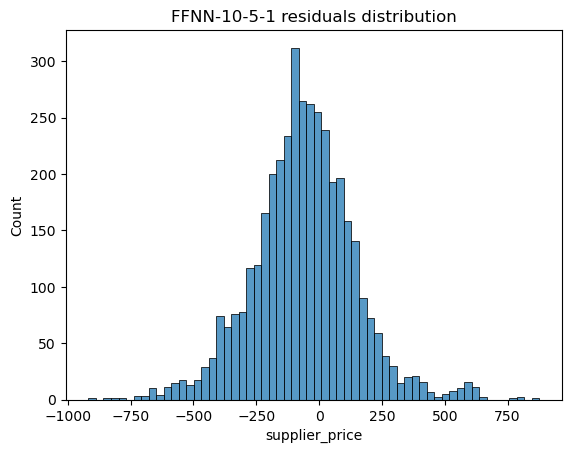

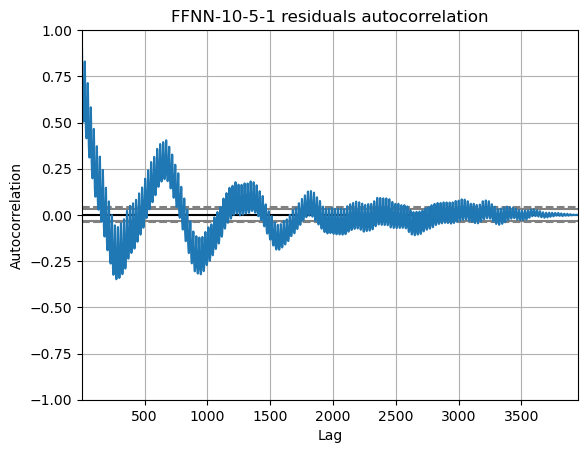

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
128.9322566101704

Jarque-Bera:           NOT Normal
305.78784592317277

Kolmogorov-Smirnov:    NOT Normal
0.03419221771567593

Lilliefors:            NOT Normal
0.03419221771567593

Shapiro-Wilk:          NOT Normal
0.9855201244354248

Anderson–Darling:      NOT Normal
12.123205091322689

----------------
FFNN-10-5-2-1 model...
700/700 [==============================] - 6s 8ms/step - loss: 0.5936


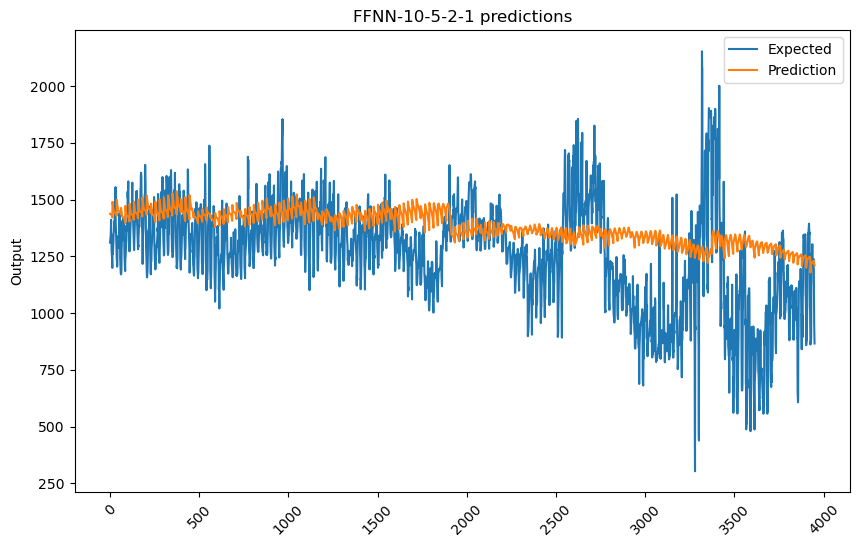

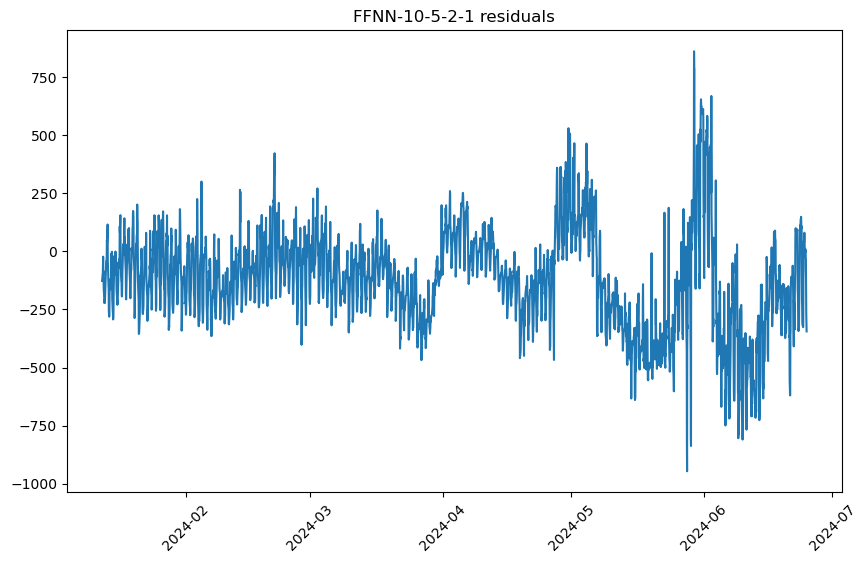

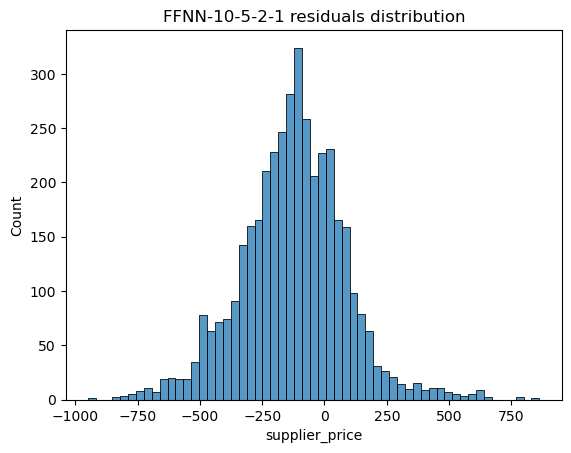

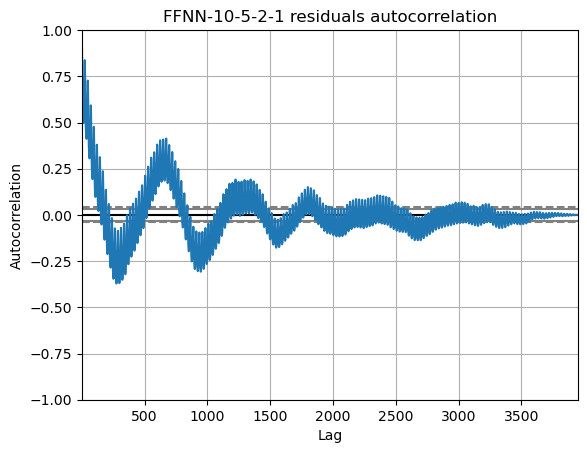

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
105.53026992755672

Jarque-Bera:           NOT Normal
245.1323688935427

Kolmogorov-Smirnov:    NOT Normal
0.034619796708348916

Lilliefors:            NOT Normal
0.034619796708348916

Shapiro-Wilk:          NOT Normal
0.9867376089096069

Anderson–Darling:      NOT Normal
11.451372471137802

----------------
FFNN-20-10-5-1 model...
700/700 [==============================] - 7s 9ms/step - loss: 0.5559


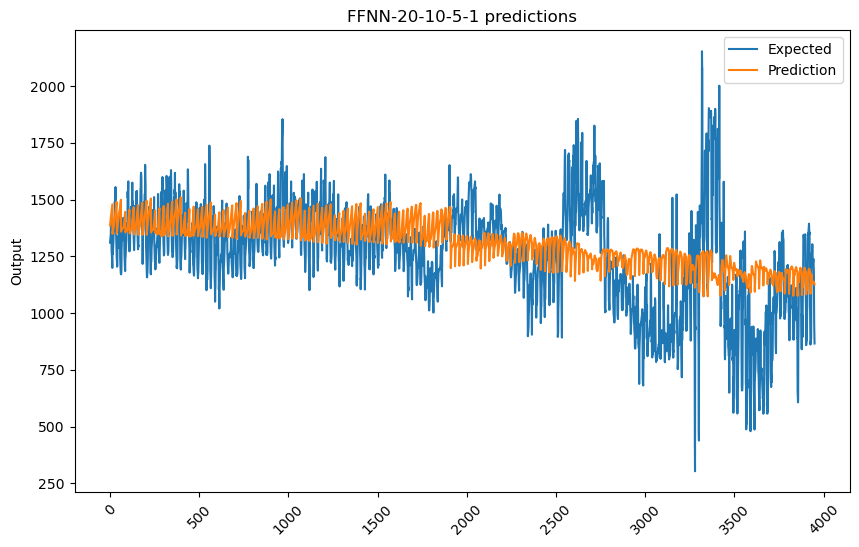

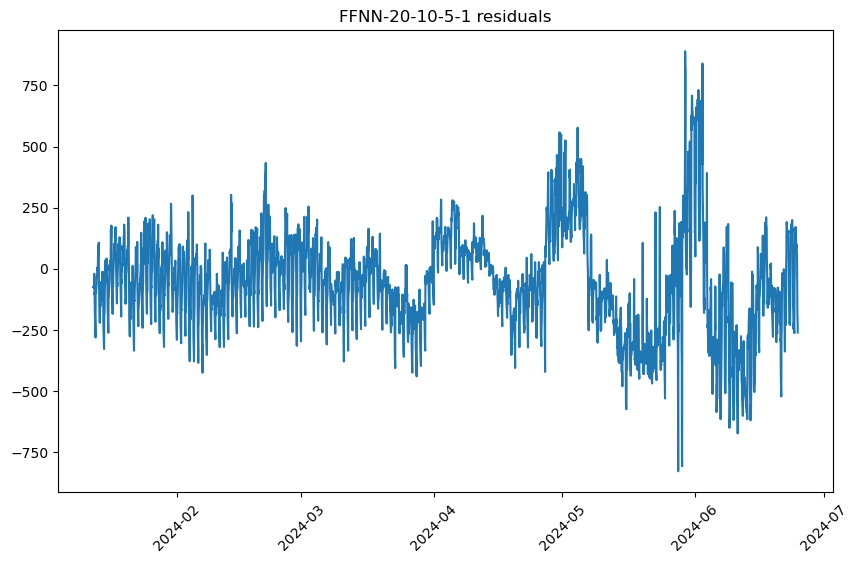

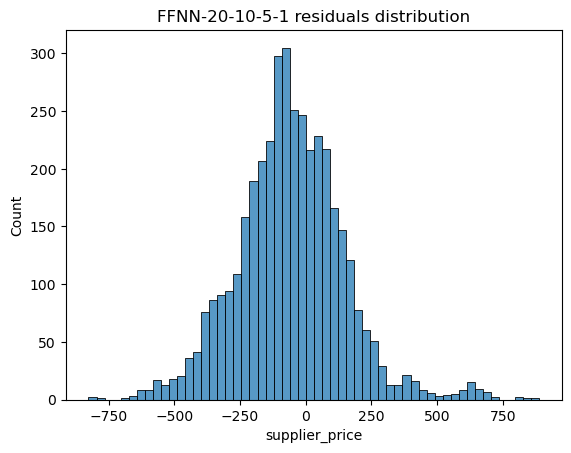

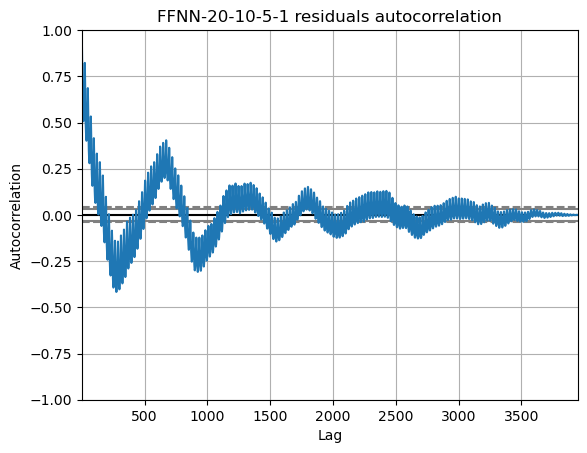

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
196.90311146145686

Jarque-Bera:           NOT Normal
416.0270099104738

Kolmogorov-Smirnov:    NOT Normal
0.03423081687776619

Lilliefors:            NOT Normal
0.03423081687776619

Shapiro-Wilk:          NOT Normal
0.9823659658432007

Anderson–Darling:      NOT Normal
11.334240975534158

----------------
FFNN-20-10-5-2-1 model...
700/700 [==============================] - 8s 10ms/step - loss: 0.6551


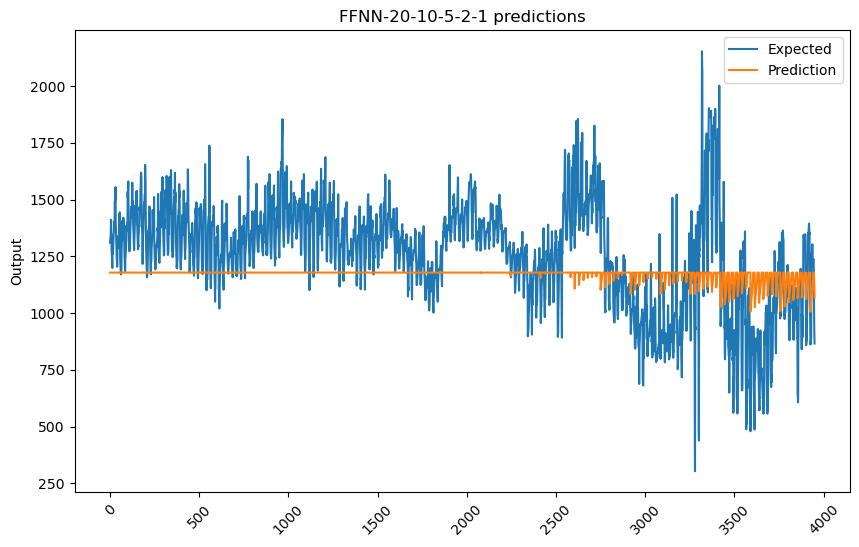

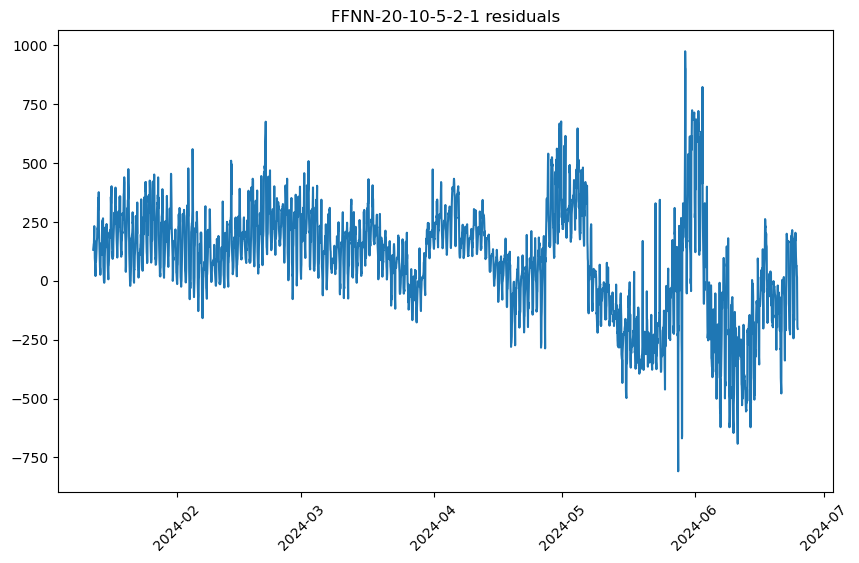

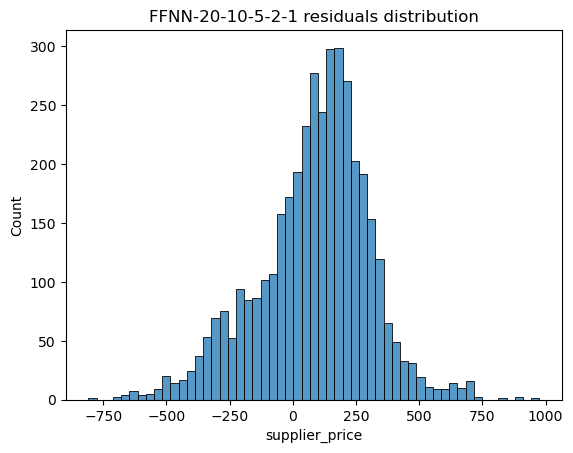

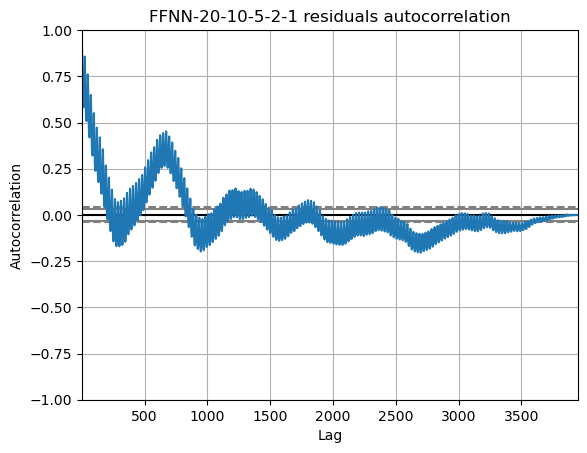

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
132.8527145226394

Jarque-Bera:           NOT Normal
169.46526867519717

Kolmogorov-Smirnov:    NOT Normal
0.06285879158896723

Lilliefors:            NOT Normal
0.06285879158896723

Shapiro-Wilk:          NOT Normal
0.9813981652259827

Anderson–Darling:      NOT Normal
28.015740947728773



In [17]:
names = []
for name, model in models:
    print('----------------')
    print(f'{name} model...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    pred = x_test.copy()
    pred[TARGET_COLUMN] = y_pred
    pred = scaler.inverse_transform(pred)
    pred = pd.DataFrame(pred, columns = df_test.columns, index = df_test.index)
    y_pred = pred[TARGET_COLUMN]
    y_test_target = df_test[TARGET_COLUMN]
    y_train_target = df_train[TARGET_COLUMN]
    results['r2'].append(r2(y_test_target, y_pred))
    results['mse'].append(mse(y_test_target, y_pred))
    results['rmse'].append(rmse(y_test_target, y_pred))
    results['mae'].append(mae(y_test_target, y_pred))
    results['mape'].append(mape(y_test_target, y_pred))
    results['smape'].append(smape(y_test_target, y_pred))
    results['mase'].append(mase(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
    results['msse'].append(msse(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
    results['rmsse'].append(rmsse(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
    show_regression_chart(y_test_target, y_pred, f'{name} predictions', sort = False)
    # Unexplained variation
    residuals = y_test_target - y_pred
    show_line_plot(residuals, f'{name} residuals')
    show_histogram(residuals, f'{name} residuals distribution')
    show_acf_plot(residuals, f'{name} residuals autocorrelation')
    print('-' * 10)
    print('Statistical test for normality of residuals:')
    print('-' * 10)
    print()
    run_tests_for_normality(residuals)
    names.append(name)

In [18]:
ml_dl_results_table = pd.DataFrame(results, index = names)
ml_dl_results_table.index.name = 'Name'
ml_dl_results_table = ml_dl_results_table.applymap(lambda x: round(x, ndigits = 3))
ml_dl_results_table

r2         mse     rmse      mae    mape   smape   mase   
Name                                                                           
Naive            -6.500  395179.502  628.633  587.855  44.867  59.028  7.423  \
Average          -0.589   83728.625  289.359  247.179  19.644  20.764  3.121   
Drift            -2.747  197416.925  444.316  393.052  31.672  35.478  4.963   
LR               -0.135   59808.824  244.558  181.121  17.486  14.912  2.287   
Bayesian R.      -0.132   59630.208  244.193  180.937  17.453  14.899  2.285   
PAR              -1.269  119546.275  345.755  303.795  24.145  26.193  3.836   
SGD              -0.023   53913.250  232.192  177.559  16.361  14.699  2.242   
SVR              -0.950  102761.242  320.564  277.200  21.285  23.708  3.500   
Lin. SVR         -0.236   65147.810  255.241  188.771  18.400  15.449  2.384   
KNN               0.059   49595.291  222.700  166.331  15.606  13.751  2.100   
CART             -0.161   61169.941  247.326  191.771  17.663  15.730  2.421   
RF               -0.143   60196.864  245.350  190.377  17.544  15.611  2.404   
RF w/B.          -0.091   57490.805  239.772  184.057  17.087  15.073  2.324   
XT               -0.041   54849.983  234.201  177.077  16.533  14.551  2.236   
XT w/B.          -0.035   54533.770  233.525  176.296  16.476  14.486  2.226   
BAG              -0.147   60431.862  245.829  191.448  17.636  15.691  2.417   
BAG w/B.         -0.100   57958.537  240.746  185.374  17.201  15.187  2.341   
ADA               0.132   45717.912  213.817  173.407  14.672  14.384  2.190   
HGBoost           0.003   52535.256  229.206  171.662  16.108  14.076  2.168   
XGBoost          -0.100   57963.642  240.756  181.942  17.109  14.908  2.297   
CatBoost         -0.065   56101.503  236.858  176.870  16.710  14.468  2.233   
FFNN-10-1        -0.048   55225.903  235.002  180.278  17.251  14.822  2.276   
FFNN-10-5-1       0.144   45102.355  212.373  161.677  15.070  13.447  2.041   
FFNN-10-5-2-1    -0.140   60071.669  245.095  190.490  18.155  15.556  2.405   
FFNN-20-10-5-1    0.148   44907.204  211.913  162.672  14.950  13.484  2.054   
FFNN-20-10-5-2-1 -0.061   55924.081  236.483  192.243  16.149  15.930  2.427   

                    msse  rmsse  
Name                             
Naive             30.725  5.543  
Average            6.510  2.551  
Drift             15.349  3.918  
LR                 4.650  2.156  
Bayesian R.        4.636  2.153  
PAR                9.295  3.049  
SGD                4.192  2.047  
SVR                7.990  2.827  
Lin. SVR           5.065  2.251  
KNN                3.856  1.964  
CART               4.756  2.181  
RF                 4.680  2.163  
RF w/B.            4.470  2.114  
XT                 4.265  2.065  
XT w/B.            4.240  2.059  
BAG                4.699  2.168  
BAG w/B.           4.506  2.123  
ADA                3.555  1.885  
HGBoost            4.085  2.021  
XGBoost            4.507  2.123  
CatBoost           4.362  2.089  
FFNN-10-1          4.294  2.072  
FFNN-10-5-1        3.507  1.873  
FFNN-10-5-2-1      4.671  2.161  
FFNN-20-10-5-1     3.492  1.869  
FFNN-20-10-5-2-1   4.348  2.085

In [19]:
def get_min_errors(results_table, metric_columns):
    methods = []
    errors = []
    for column in results_table[metric_columns]:
        if column.lower() == 'r2':
            index_of_max = results_table[column].idxmax()
            methods.append(index_of_max)
            errors.append(results_table[column][index_of_max])
        else:
            index_of_min = results_table[column].idxmin()
            methods.append(index_of_min)
            errors.append(results_table[column][index_of_min])
    return pd.DataFrame(data = {'Method': methods, 'Error': errors}, index = metric_columns)

metric_columns = [
    'r2',
    'mse',
    'rmse',
    'mae',
    'mape',
    'smape',
    'mase',
    'msse',
    'rmsse'
]

print('Minimal errors:')
get_min_errors(ml_dl_results_table, metric_columns)

Minimal errors:


Method      Error
r2     FFNN-20-10-5-1      0.148
mse    FFNN-20-10-5-1  44907.204
rmse   FFNN-20-10-5-1    211.913
mae       FFNN-10-5-1    161.677
mape              ADA     14.672
smape     FFNN-10-5-1     13.447
mase      FFNN-10-5-1      2.041
msse   FFNN-20-10-5-1      3.492
rmsse  FFNN-20-10-5-1      1.869

In [31]:
print('Minimal errors (without perceptrons):')
get_min_errors(ml_dl_results_table.drop([
    'FFNN-10-1',
    'FFNN-10-5-1',
    'FFNN-10-5-2-1',
    'FFNN-20-10-5-1',
    'FFNN-20-10-5-2-1',
]), metric_columns)

Minimal errors (without perceptrons):


Method      Error
r2       ADA      0.132
mse      ADA  45717.912
rmse     ADA    213.817
mae      KNN    166.331
mape     ADA     14.672
smape    KNN     13.751
mase     KNN      2.100
msse     ADA      3.555
rmsse    ADA      1.885

## Voting Regressor

In [20]:
x_train, y_train, x_test, y_test, scaler = get_scaled_data(df_train, df_test)

In [24]:
voting_models = []
voting_models.append(('LR', LinearRegression(fit_intercept = False)))
voting_models.append(('Bayesian R.', BayesianRidge(fit_intercept = False)))
voting_models.append(('PAR', PassiveAggressiveRegressor(
    max_iter = 100,
    random_state = RANDOM_STATE,
    tol = 1e-3,
    fit_intercept = False)))
voting_models.append(('SGD', SGDRegressor(random_state = RANDOM_STATE, shuffle = False, fit_intercept = False)))
voting_models.append(('SVR', SVR(max_iter = 100)))
voting_models.append(('Lin. SVR', LinearSVR(max_iter = 100, random_state = RANDOM_STATE, fit_intercept = False)))
voting_models.append(('KNN', KNeighborsRegressor(n_neighbors = 20, n_jobs = N_JOBS)))
voting_models.append(('CART', DecisionTreeRegressor(random_state = RANDOM_STATE)))
voting_models.append(('RF', RandomForestRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
voting_models.append(('RF w/B.', RandomForestRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
voting_models.append(('XT', ExtraTreesRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
voting_models.append(('XT w/B.', ExtraTreesRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
voting_models.append(('BAG', BaggingRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = False)))
voting_models.append(('BAG w/B.', BaggingRegressor(n_jobs = N_JOBS, random_state = RANDOM_STATE, bootstrap = True)))
voting_models.append(('ADA', AdaBoostRegressor(random_state = RANDOM_STATE)))
voting_models.append(('HGBoost', HistGradientBoostingRegressor(random_state = RANDOM_STATE)))
voting_models.append(('XGBoost', XGBRegressor(tree_method = 'gpu_hist', verbosity = 0, random_state = RANDOM_STATE)))
voting_models.append(('CatBoost', CatBoostRegressor(
    random_seed = RANDOM_STATE,
    loss_function = 'RMSE',
    eval_metric = 'MAE',
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    logging_level = 'Silent')))
# No DL models :(

C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\dexp\miniconda3\envs\energy\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Default metric period is 5 because MAE is/are not implemented for GPU


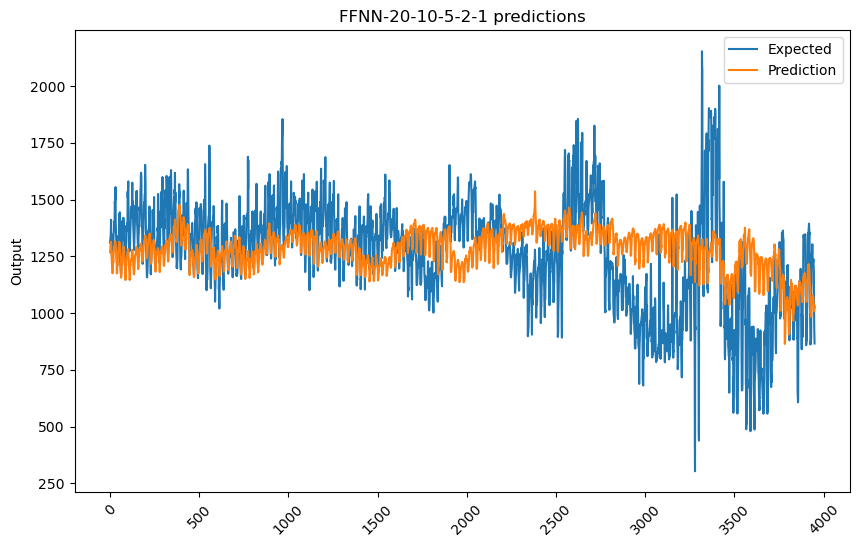

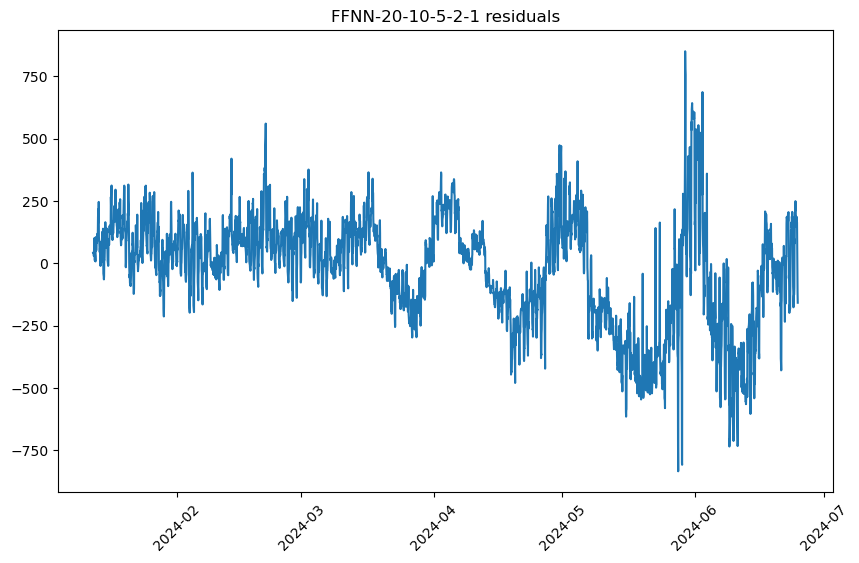

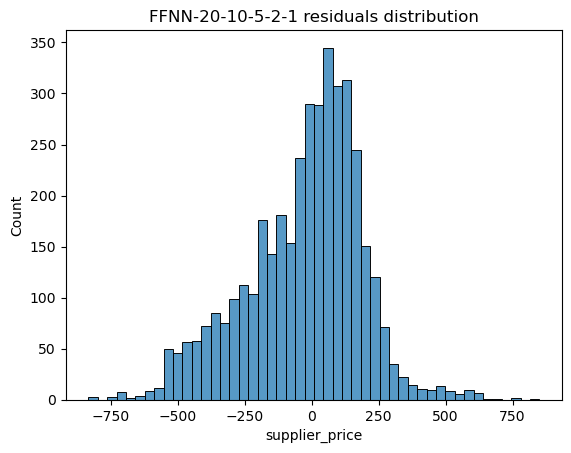

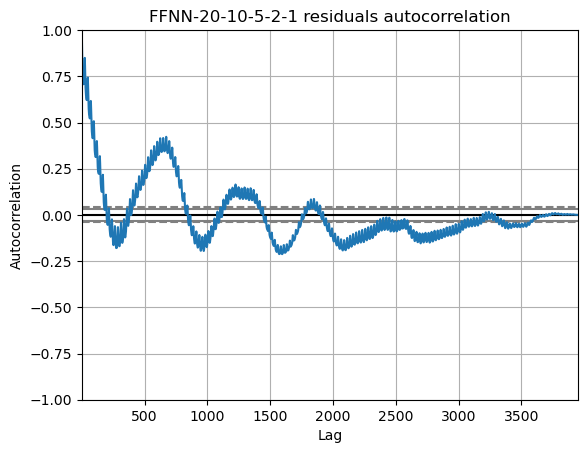

----------
Statistical test for normality of residuals:
----------

D'Agostino & Pearson:  NOT Normal
131.03528541647756

Jarque-Bera:           NOT Normal
147.80673999913643

Kolmogorov-Smirnov:    NOT Normal
0.07893067458636083

Lilliefors:            NOT Normal
0.07893067458636083

Shapiro-Wilk:          NOT Normal
0.9747546315193176

Anderson–Darling:      NOT Normal
39.95568921490121



In [25]:
from sklearn.ensemble import VotingRegressor

name = 'Voting reg.'
vreg = VotingRegressor(voting_models)
vreg.fit(x_train, y_train)
y_pred = vreg.predict(x_test)
pred = x_test.copy()
pred[TARGET_COLUMN] = y_pred
pred = scaler.inverse_transform(pred)
pred = pd.DataFrame(pred, columns = df_test.columns, index = df_test.index)
y_pred = pred[TARGET_COLUMN]
y_test_target = df_test[TARGET_COLUMN]
y_train_target = df_train[TARGET_COLUMN]
results['r2'].append(r2(y_test_target, y_pred))
results['mse'].append(mse(y_test_target, y_pred))
results['rmse'].append(rmse(y_test_target, y_pred))
results['mae'].append(mae(y_test_target, y_pred))
results['mape'].append(mape(y_test_target, y_pred))
results['smape'].append(smape(y_test_target, y_pred))
results['mase'].append(mase(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
results['msse'].append(msse(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
results['rmsse'].append(rmsse(y_test_target, y_pred, y_train_target, sp = SEASONALITY))
show_regression_chart(y_test_target, y_pred, f'{name} predictions', sort = False)
# Unexplained variation
residuals = y_test_target - y_pred
show_line_plot(residuals, f'{name} residuals')
show_histogram(residuals, f'{name} residuals distribution')
show_acf_plot(residuals, f'{name} residuals autocorrelation')
print('-' * 10)
print('Statistical test for normality of residuals:')
print('-' * 10)
print()
run_tests_for_normality(residuals)
names.append(name)

In [26]:
results_table = pd.DataFrame(results, index = names)
results_table.index.name = 'Name'
results_table = results_table.applymap(lambda x: round(x, ndigits = 3))
results_table

r2         mse     rmse      mae    mape   smape   mase   
Name                                                                           
Naive            -6.500  395179.502  628.633  587.855  44.867  59.028  7.423  \
Average          -0.589   83728.625  289.359  247.179  19.644  20.764  3.121   
Drift            -2.747  197416.925  444.316  393.052  31.672  35.478  4.963   
LR               -0.135   59808.824  244.558  181.121  17.486  14.912  2.287   
Bayesian R.      -0.132   59630.208  244.193  180.937  17.453  14.899  2.285   
PAR              -1.269  119546.275  345.755  303.795  24.145  26.193  3.836   
SGD              -0.023   53913.250  232.192  177.559  16.361  14.699  2.242   
SVR              -0.950  102761.242  320.564  277.200  21.285  23.708  3.500   
Lin. SVR         -0.236   65147.810  255.241  188.771  18.400  15.449  2.384   
KNN               0.059   49595.291  222.700  166.331  15.606  13.751  2.100   
CART             -0.161   61169.941  247.326  191.771  17.663  15.730  2.421   
RF               -0.143   60196.864  245.350  190.377  17.544  15.611  2.404   
RF w/B.          -0.091   57490.805  239.772  184.057  17.087  15.073  2.324   
XT               -0.041   54849.983  234.201  177.077  16.533  14.551  2.236   
XT w/B.          -0.035   54533.770  233.525  176.296  16.476  14.486  2.226   
BAG              -0.147   60431.862  245.829  191.448  17.636  15.691  2.417   
BAG w/B.         -0.100   57958.537  240.746  185.374  17.201  15.187  2.341   
ADA               0.132   45717.912  213.817  173.407  14.672  14.384  2.190   
HGBoost           0.003   52535.256  229.206  171.662  16.108  14.076  2.168   
XGBoost          -0.100   57963.642  240.756  181.942  17.109  14.908  2.297   
CatBoost         -0.065   56101.503  236.858  176.870  16.710  14.468  2.233   
FFNN-10-1        -0.048   55225.903  235.002  180.278  17.251  14.822  2.276   
FFNN-10-5-1       0.144   45102.355  212.373  161.677  15.070  13.447  2.041   
FFNN-10-5-2-1    -0.140   60071.669  245.095  190.490  18.155  15.556  2.405   
FFNN-20-10-5-1    0.148   44907.204  211.913  162.672  14.950  13.484  2.054   
FFNN-20-10-5-2-1 -0.061   55924.081  236.483  192.243  16.149  15.930  2.427   
Voting reg.       0.093   47806.891  218.648  167.795  15.487  13.900  2.119   

                    msse  rmsse  
Name                             
Naive             30.725  5.543  
Average            6.510  2.551  
Drift             15.349  3.918  
LR                 4.650  2.156  
Bayesian R.        4.636  2.153  
PAR                9.295  3.049  
SGD                4.192  2.047  
SVR                7.990  2.827  
Lin. SVR           5.065  2.251  
KNN                3.856  1.964  
CART               4.756  2.181  
RF                 4.680  2.163  
RF w/B.            4.470  2.114  
XT                 4.265  2.065  
XT w/B.            4.240  2.059  
BAG                4.699  2.168  
BAG w/B.           4.506  2.123  
ADA                3.555  1.885  
HGBoost            4.085  2.021  
XGBoost            4.507  2.123  
CatBoost           4.362  2.089  
FFNN-10-1          4.294  2.072  
FFNN-10-5-1        3.507  1.873  
FFNN-10-5-2-1      4.671  2.161  
FFNN-20-10-5-1     3.492  1.869  
FFNN-20-10-5-2-1   4.348  2.085  
Voting reg.        3.717  1.928

In [27]:
print('Minimal errors:')
get_min_errors(results_table, metric_columns)

Minimal errors:


Method      Error
r2     FFNN-20-10-5-1      0.148
mse    FFNN-20-10-5-1  44907.204
rmse   FFNN-20-10-5-1    211.913
mae       FFNN-10-5-1    161.677
mape              ADA     14.672
smape     FFNN-10-5-1     13.447
mase      FFNN-10-5-1      2.041
msse   FFNN-20-10-5-1      3.492
rmsse  FFNN-20-10-5-1      1.869

In [30]:
print('Minimal errors (without perceptrons):')
get_min_errors(results_table.drop([
    'FFNN-10-1',
    'FFNN-10-5-1',
    'FFNN-10-5-2-1',
    'FFNN-20-10-5-1',
    'FFNN-20-10-5-2-1',
]), metric_columns)

Minimal errors (without perceptrons):


Method      Error
r2       ADA      0.132
mse      ADA  45717.912
rmse     ADA    213.817
mae      KNN    166.331
mape     ADA     14.672
smape    KNN     13.751
mase     KNN      2.100
msse     ADA      3.555
rmsse    ADA      1.885